# 1章　ディープラーニングのためのPythonのツボ



---


# コンテナデータ型
pythonでは，下記のように`y = x`のように代入した場合，`x`と`y`の値は共通したままになる

In [ ]:
import numpy as np
x = np.array([5,7,9]) # 配列を定義
y = x # yに代入
print(x)
print(y)

[5 7 9]
[5 7 9]


<br>

ここで，`x`の1番目の要素を変更すると，
**`y`の1番目の要素も変更される**ため注意！！！  
※ pythonのデータの持ち方のイメージは以下  
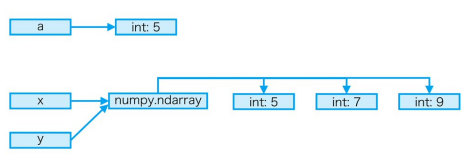

In [ ]:
x[1] = -1 # x[1]の値を-1に変更

print(x)
print(y) # y[1]の値も変わっている！！！！

[ 5 -1  9]
[ 5 -1  9]


<br>

以下のように，`copy`を用いれば，`x`と`y`を別の変数として扱うことが可能

In [ ]:
x = np.array([5, 7, 9])
y = x.copy() # yにxを「「コピー」」

x[1] = -1
print(x)
print(y) # コピーしたので，yの内容のみ変更

[ 5 -1  9]
[5 7 9]


<br>

pytorchでも同様に`copy`を用いない場合は，配列内の要素の値が共有されるので注意

- `copy`しない場合(pytorch)

In [ ]:
import torch

x1 = torch.ones(5) # 長さが5で，要素の値が全て1のテンソルを作成
print(x1)

x2 = x1.data.numpy() # x1から生成したnumpy形式の配列
print(x2)

x1[1] = -1
print(x1)
print(x2) # x2の要素の値も変化！！！

RuntimeError: ignored

- `copy`を用いた場合(pytorch)

In [ ]:
x1 = torch.ones(5)
x2 = x1.data.numpy().copy() # x2にx1を「「コピー」」

x1[1] = -1

print(x1)
print(x2) # コピーしたので，x2の内容はそのまま



---


# 合成関数
ディープラーニングは**「膨大なパラメータを持つ複雑な合成関数」**ともいえる



---


## 関数をpythonで実装
合成関数の前に，簡単な関数をpythonで実装してみる  
下図が関数のイメージ  
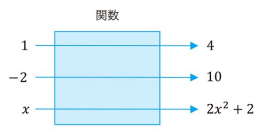

 <br>

 ### $ f(x) = 2x^{2}+2 $をpythonで実装
- 関数を定義

In [ ]:
def f(x):
  return (2 * x**2 + 2)

<br>

- 任意の$x$の範囲（今回の場合，-2～2.0に設定）で$ f(x) = 2x^{2}+2 $を求める

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xの範囲を決定
print(x)
y = f(x) # f(x)の結果をyに代入
print(y)

<br>

- 結果をグラフで描画

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()



---


## 合成関数をpythonで実装
合成関数とは，  
**関数$f_1$と関数$f_2$があるとき，「関数$f_1$の出力を関数$f_2$に入力することで組み合わせて作った全体を新しい関数$g$とみなしたもの」**  
以下に合成関数のイメージ図を示す  
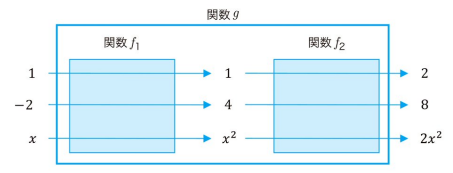

### $f_1(x)=x^{2}, f_2(x)=2x, f_3(x)=x+2$をpythonで実装
先程の関数 $ f(x) = 2x^{2}+2$ を分解して 

$f_1(x)=x^{2}, f_2(x)=2x, f_3(x)=x+2$  の合成関数として実装する

- $f_1, f_2, f_3$を定義

In [ ]:
def f1(x):
  return (x**2)
def f2(x):
  return(x*2)
def f3(x):
  return(x+2)

<br>

- 合成関数を作成  
イメージは以下図  
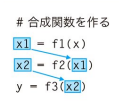

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xを適当な範囲で設定
x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

<br>

- 描画  
$ f(x) = 2x^{2}+2$と同じ結果であることが確認できる

In [ ]:
plt.plot(x, y)
plt.show()



---


# 数値微分


---


## 関数の関数
下図のように，**関数を入力**として**関数を出力**とするような関数を**関数の関数**という  
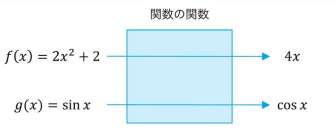



---


# 微分の実装
**「関数を引数で受け取り，微分した結果の関数を返す関数」**を実装する

微分の定義は以下  
 $f'(x) = \lim_{h\to0}\dfrac{f(x+h)-f(x-h)}{h}$  
 <br>
 より正式に，微分計算が可能な数式は以下．以降はこの数式を使用する  
 $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$  
ここで**$h$に非常に小さな値を代入して計算すれば，微分結果が近似的に求まる**のでそれをpythonで実装する

<br>  
- 「関数を微分する関数」を定義

In [ ]:
def fdiff(f):

  # 関数fを引数に微分した結果の関数
  def diff(x):
    h = 1e-6 # hには非常に小さい数値を設定
    print("(f(x+h) - f(x-h)) / (2*h)：", (f(x+h) - f(x-h)) / (2*h))
    return (f(x+h) - f(x-h)) / (2*h)
  
  # 微分した結果の「関数diff」
  print("diff：", diff)
  return diff

<br>  
- 作成した関数を使用して，微分をする
  - printされたdiffを見ると，関数（<function fdiff.<locals>.diff at ooooooo>）が返されていることがわかる

In [ ]:
# 関数fを定義（再掲）
def f(x):
  return (2 * x**2 + 2)

diff = fdiff(f) # fの微分結果の「関数diff」を取得

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xを適当な範囲で設定
y_dash = diff(x) # 微分結果を計算，y_dashに代入
print("y_dash：", y_dash)

<br>  
- $2x^{2}+2$のグラフと，微分後のグラフを表示（$2x^{2}+2$を解析的に求めると$4x$）

In [ ]:
plt.plot(x, y, label=r'y=f(x)', c="b")
plt.plot(x, y_dash, label=r"y=f'(x)", c="k")
plt.legend()
plt.show()



---


より複雑な関数でも，微分が可能なことを**「シグモイド関数」**で確認する  
 $g(x) = \dfrac{1}{1 + \exp(-x)}$

- シグモイド関数を定義

In [ ]:
# シグモイド関数
def g(x):
  return 1 / (1+np.exp(-x))

<br>  
- シグモイド関数を計算

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xを適当な範囲で設定
y = g(x)
print(y)

<br>  
- 描画

In [ ]:
plt.plot(x, y)
plt.show()

<br>  
- シグモイド関数を先程の「微分関数diff」にかける 

In [ ]:
# シグモイド関数（再掲）
def g(x):
  return 1 / (1+np.exp(-x))

diff = fdiff(g) # gを微分した関数を取得

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xを適当な範囲で設定
y_dash = diff(x)

<br>  

- シグモイド関数の微分前と微分後を描画  
  - シグモイド関数は，元の関数$y$によって，$y(1-y)$で表される．$y(1-y)$は$y$の2次間数であり，グラフからも分かるように$y=0.5$の時に最大値0.25を取る．

In [ ]:
plt.plot(x, y, label=r'y=f(x)', c="b")
plt.plot(x, y_dash, label=r"y=f'(x)", c="k")
plt.legend()
plt.show()

<br>  
ディープラーニングの学習アルゴリズムは，「損失」という膨大なパラメータを持つ複雑な合成関数の微分計算をし，その計算結果を利用して最適なパラメータ値を求める仕組み．  

すなわち，**ディープラーニングの本質は微分計算にある**   

pytorchではこの，数値微分による微分計算をかんたんにできる仕組みが内蔵されている




---


# クラス
pytorchを使うにあたって，覚えておくべき重要なpythonの機能として**「クラス」**がある



---


## クラスPointを定義
クラスの属性として点の座標を意味する`x`, `y`を持ち，点を描画する関数`draw()`を持つクラス`Point`を定義する．  
下記がイメージ図  
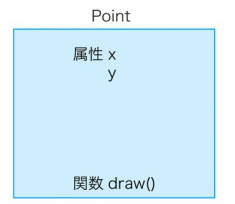

<br>  
- class`Point`を定義

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches # circleの描画に使用

class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def draw(self):
    plt.plot(self.x, self.y, marker="o", markersize=10, c="k")

<br>  
- クラスからインスタンスを生成
  - 下記コードでは，`p1`と`p2`の２つのインスタンスを生成している

In [ ]:
p1 = Point(2, 3)
p2 = Point(-1, -2)

<br>  
- インスタンスの属性へアクセス
  - 生成した`p1`と`p2`の属性`x`,`y`にそれぞれアクセスする

In [ ]:
print(p1.x, p1.y)
print(p2.x, p2.y)

<br>  
インスタンスが所有する関数`draw()`を呼び出す

In [ ]:
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()



---


## クラスの継承
次に，`Circle`クラスを定義する．  

このクラスは中心点の座標x, yと半径rの属性を持つこととする

この際，`Point`クラスも同様に属性としてx,yをもつ．このような時に，`Point`の`x`, `y`を**再利用**して`Circle`でも使用することを**「クラスの継承」**という．  

※ イメージ図は以下  
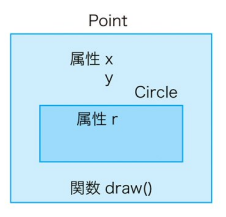

- `Cilcle`クラスを定義する．なお，`Circle`クラスは改善を加えたものを複数個作成するので，ここでは`Circle1`とする

In [ ]:
# 継承のときは
# class 小クラス(親クラス)
# の形で記述
class Circle1(Point):
  def __init__(self, x, y, r):
    super().__init__(x, y) # x, yは親クラスPointの属性として設定
    self.r = r # rはCircle1の属性として定義

<br>  
- クラス`Circle1`からインスタンス`c1_1`を生成

In [ ]:
c1_1 = Circle1(1, 0, 2)
print(c1_1.x, c1_1.y, c1_1.r) # c1_1の属性を表示

<br>  
- `draw()`関数を呼び出す
  - `Circle1`クラスでは，`draw()`関数を定義していない．
  - `draw()`関数を`Circle1`で探す→なかったら，親クラスの`Point`から探すのような手順

In [ ]:
ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()



---


上記では，`Point`クラスの`draw()`関数を用いたため，描画されたのが点になってしまっている．  

しかし，せっかく`Circle`という名前で定義したので，円を描画したい．  

そこで，`Circle1`のアップデートバージョン`Circle2`を定義する.  

イメージ図は以下  
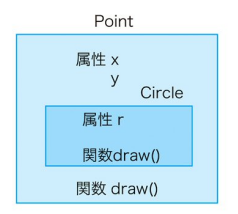

<br>  
- `Circle2`を定義
  - ここで，`draw_circle()`のようにして別の名前の関数を作成してもよいが，クラスの特性を確認するために親クラスと同じ`draw()`という名前で関数を定義する

In [ ]:
# 継承のときは
# class 小クラス(親クラス)
# の形で記述
class Circle2(Point):
  def __init__(self, x, y, r):
    super().__init__(x, y) # x, yは親クラスPointの属性として設定
    self.r = r # rはCircle1の属性として定義
  
  # -----------------------  以下追加部分 -----------------------------
  def draw(self):
    c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc="b", ec="k")# 円を描画
    ax.add_patch(c)

<br>  
- クラスからインスタンスを生成

In [ ]:
c2_1 = Circle2(1, 0, 2)

<br>  
- 描画
  - `c2_1`の`draw()`関数を呼び出すと円が描画されることがわかる．  一般的な言葉で言い換えると，**「小クラスで同じ名前の関数を定義してふるまいを変更する」**ということである．これを**「オーバーライド」**と呼ぶ

In [ ]:
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()



---


次に，`Circle2`の機能に加えて，`Circle1`が元々所有していた，`draw()`関数を追加したいので，新たに`Circle3`を作成する  
イメージは下図  
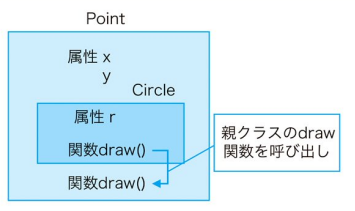

- クラス`Circle3`を定義
 - `super().draw()`のように指定すると，**親クラス`Point`の`draw()`を呼び出すことができる**

In [ ]:
# 継承のときは
# class 小クラス(親クラス)
# の形で記述
class Circle3(Point):
  def __init__(self, x, y, r):
    super().__init__(x, y) # x, yは親クラスPointの属性として設定
    self.r = r # rはCircle1の属性として定義
  
  def draw(self):
    #----以下追加部分---------------------
    super().draw() #親クラスのdraw関数を呼び出す
    #----追加部分ここまで-----------------
    c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc="b", ec="k")# 円を描画
    ax.add_patch(c)

<br>  
- インスタンス`c3_1`を生成

In [ ]:
c3_1 = Circle3(1, 0, 2)

<br>  
- draw関数を呼び出し
  - `c3_1`で「`Circle3`で定義した`draw()`」と「`Point`で定義した`draw()`」の**両方**が呼び出せていることが確認できる

In [ ]:
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()



---


# インスタンスを関数として使う
PyTorchでは**「クラスから生成したインスタンスを呼び出し可能な関数にする」**といった実装が様々な箇所で利用されているため，その方法について説明する

<br>  
- クラス`H`を定義
  - `__call__`関数をクラス内で定義することで，クラスから生成したインスタンスを関数として使用可能
  - ここでは先程も使用した$ f(x) = 2x^{2}+2 $を`__call__`関数として定義

In [ ]:
class H:
  def __call__(self, x):
    return 2 * x**2 + 2

<br>  
- クラス`H`のインスタンスを関数として呼び出し

In [ ]:
x = np.arange(-2, 2.1, 0.25) # xを適当な範囲で設定

h = H()

y = h(x) # 関数hを呼び出し
print(y)

<br>  

- グラフを描画
  - グラフからも **「クラスから生成したインスタンスが関数として利用できている」** 事がわかる

In [ ]:
plt.plot(x, y)
plt.show()



---

# 2章　PyTorchの基本機能

In [ ]:
import torch



---


# テンソルの階数
様々なか「階数」のテンソルを作成する  
テンソルの階数による違いは簡単に言うと以下  
- 0階のテンソル：スカラー
- 1階のテンソル：ベクトル
- 2会のテンソル：行列



---


0階のテンソルを作成
- `torch.tensor()`の`()`内に数値（スカラー）を入れると0階のテンソルを作成可能
- `torch.tensor(1.0)`の後ろに`float()`をつけることで，強制的にfloat32に変換する．
  - float32に変換しない場合，dtypeがfloat64になる．この場合，**「nn.linear」などの機械学習で利用するライブラリを使う時にエラーになってしまう**ので，必ず変換する

In [ ]:
r0 = torch.tensor(1.0).float() #0階のテンソル

print(type(r0)) # typeを調べる

print(r0.dtype) # dtypeを調べる

<br>  
- 変数`r0`のshepe（要素数）とデータの中身を確認
  - numpyと同様にテンソル変数もshep属性を持つ．
    - しかし，表記方法が異なり，print関数を使用すると`Torch.Size[]`のように表記される
    - 今回は，0階のテンソルなので`[]`内が存在しないが，**例えば2行3列の行列（2階テンソル）の場合は，`Torch.Size[2, 3]`のように表記**される

In [ ]:
print(r0.shape)

print(r0.data)

 

---


- 1階のテンソル（ベクトル）を定義して，`dtype`，`shepe`，`data`を確認する
  - 今回は，numpy変数をテンソルに変換する．
  - **numpy <-> tensorは相互に変換可能なのでこの方法はよく使われる**

In [ ]:
import numpy as np
r1_np = np.array([1, 2, 3, 4, 5]) # 1階のnumpy変数を作成
print("r1_np.shape: ", r1_np.shape)

r1 = torch.tensor(r1_np).float() # numpy -> テンソルに変換

print("r1.dtype: ", r1.dtype)
print("r1.shape: ", r1.shape)
print("r1.data: ", r1.data)

 

---


- 2階のテンソルを定義して，`shape`と`data`を確認する

In [ ]:
r2_np = np.array([[1, 5, 6], [4, 3, 2]]) # 2階のテンソルをnumpyで作成
print("r2_np.shape: ", r2_np.shape)

r2 = torch.tensor(r2_np).float() # numpy -> テンソルに変換

print("r2.shape: ", r2.shape)
print("r2.data: ", r2.data)



---


- 3階のテンソルを定義
  - 2階のテンソルまでのときと異なり`randn`関数で平均0, 分散1の正規分布に従った乱数値をテンソルの各値に格納
  - `torch.manual_seed()`で，シード値を与えることで，毎回同じ値が生成（ランダムでなくなる）される
    -  `torch.manual_seed()`を，指定しない場合は「平均0, 分散1の正規分布」に従って毎回ランダムな値が生成される

In [ ]:
torch.manual_seed(123) # 乱数seedの初期化

r3 = torch.randn((3, 2, 2)) # shape=[3,2,2]の正規分布変数テンソルを作成

print("r3.shape: ", r3.shape)
print("r3.data: ", r3.data)



---


- 4階のテンソルを定義
  - 今回は，`torch.ones()`ですべての値が1.0のテンソルが生成されるようにテンソルを定義した

In [ ]:
r4 = torch.ones((2, 3, 2, 2)) # shape=[2,3,2,2]の要素がすべて1のテンソルを作成

print("r4,shape: ", r4.shape)
print("r4.data: ", r4.data)



---


## 整数値のテンソルを作成する
一般に，PyTorchによる計算の殆どは浮動小数点型（dtype=float32）で行う．  

しかし，**「多値分類」用の損失関数であるnn.CrossEntropyLossとnn.NLLLossは，整数型を指定する必要**がある．  

そこで，テンソルの整数型への変換方法を記述する


- 先程，定義した1階のテンソル`r1`を整数型に変換する
  - 変換後の`r5`を確認すると，`torch.int64`になっており，int64型に変換できていることがわかる

In [ ]:
r5 = r1.long() # int64への変換

print("r1.dtype: ", r1.dtype)
print("r1: ", r1)
print("\n")
print("r5.dtype: ", r5.dtype)
print("r5: ", r5)



---


## View関数
Numpyには変数の階数を変換する`reshape`という関数が存在する．  

pytorchでは，同じ機能の関数が`view`という名前で用意されている．


- 先程定義した3階のテンソル`r3`を2階のテンソルに変換する
  - 今回の場合，変換前の`r3`が[3, 2, 2]で，3×2×2=12なので，2階のテンソルの場合は，[3, X]になる．ここでX=4とすると3×4=12となり，要素数が一致する．
    - `r3.view(3, 4)`と直接値を指定してもいいが，**`r3.view(3, -1) `だと，自動で計算してくれる**
    - このようにテンソルの変換では**1箇所だけ-1を指定でき，その箇所を自動で計算**してくれる

In [ ]:
r6 = r3.view(3, -1) # 要素数に-1を指定すると，自動で調整してくれる

print("r3,shape: ", r3.shape)
print("r3.data: ", r3.data)
print("\n")
print("r6,shape: ", r6.shape)
print("r6.data: ", r6.data)


---


- 同様に`r3`を1階のテンソルに変換
  - 先程と同様に，変換前のr3が[3, 2, 2]で，3×2×2=12なので1階のテンソルの場合`r3.view(12)`となる
    - 今回の場合も，**自動で計算してくれる，`r3.view(-1)`**と指定している．

In [ ]:
r7  =r3.view(-1) # 1階のテンソルに変換

print("r3,shape: ", r3.shape)
print("r3.data: ", r3.data)
print("\n")
print("r7,shape: ", r7.shape)
print("r7.data: ", r7.data)



---


## テンソルの属性
テンソルでよく使われる属性，関数について説明


---


- requires_grad属性：自動微分に関係する（詳しくは以降）
- device属性：GPUによる計算に関係する（詳しくは8章）

In [ ]:
print("requires_grad: ", r1.requires_grad)

print("device: ", r1.device)



---


- item関数
  - テンソルから「Python本来のクラスの数理（floatまたはint）」を取り出す時に使用する
  - lossから，データ記録用に値だけを抽出するときによく使用する
  - **1階以上のテンソルでitem関数を使用するとエラーが起きるので注意**
    - ただし，1階以上のテンソルでも，shapeが[1]や[1, 1]のように要素が一つしかない場合は利用可能

In [ ]:
item = r0.item()

print(type(item))
print(item)



---


- max関数
  - 最大値を取得する

In [ ]:
print(r2)
print(r2.max())



---

- `torch.max`関数
  - max関数はクラス内関数の他に，`torch.max`関数を呼び出す方法も存在する
  - ここでは，`torch.max(r2, 1)`として軸に1を指定しているため各列ごとに最大値を返す
  - `torch.max`の場合，値だけではなくどのindexの最大値をとったかも返される  
  下記がイメージ図  
  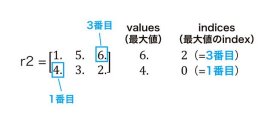

In [ ]:
print(r2)
print(torch.max(r2, 1))

<br>  
- `torch.max`の後ろに[1]をつけるとインデックスのみを抽出可能
  - これは，多値分類モデルで非常によく出てくるパターンで，**「複数の予測器の出力のうち，最も大きな値を出した予測器のインデックスが予測結果ラベルになる」**
    - 詳しくは7章

In [ ]:
print(torch.max(r2, 1)[1])



---

## NumPy変数への変換
これまでに，NumPy->テンソルへの変換を紹介したが，ここでは逆にテンソル->NumPyへの変換方法を説明する．
 - **変換後のNumPy変数は変換前のテンソルと連動している**ので，テンソル側の値を変えるとNumPy側も変わることに注意
 - 連動してほしくないときは`copy()`を使う

In [ ]:
r2_np = r2.data.numpy() # テンソル->numpy

print(type(r2_np))
print(r2_np)



---


# 自動微分機能
Pytorchの中心的な機能である「自動微分」について説明する．  
Pytorchにおける自動微分のイメージ図を下記に示す  
図の詳細については，本誌の位置No.95を参照  
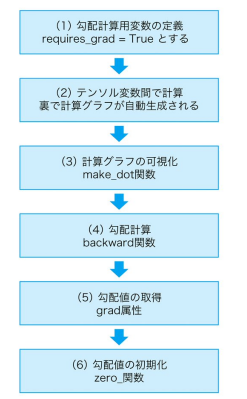



---


# 2次関数の勾配計算
2次関数$y=2x^2+2$に対して自動微分計算を行ってみる

<br>  
- 勾配計算用変数の定義

In [ ]:
x_np = np.arange(-2, 2.1, 0.25) #適当な範囲のxを用意

print(x_np)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32) # requires_grad = Trueに

print(x)

<br>  
- テンソル変数で計算
 - テンソル変数xの結果をyに代入．この場合，yも自動的にテンソル変数になる

In [ ]:
y = 2 * x**2 + 2 # 裏で計算グラフが自動生成される
print(y)

<br>  
- 描画
  - requires_grad属性がTrueのテンソル変数は，そのままではMatplotlibで扱えないが，data属性を渡すとグラフ表示が可能

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x.data, y.data)
plt.show()

<br>  
- yの値をsum関数で足す
  - **Pytorchでの勾配計算では，計算対象となる関数はスカラー**である必要がある.
  - そこで，yの値をsum関数ですべて足し，その結果をテンソル変数zに代入する

In [ ]:
z = y.sum()

<br>  

- 計算グラフの可視化
- 可視化関数make_dotを使って，変数zの計算グラフを可視化する
  - **この関数自体は可視化するだけなので，勾配計算には関係ないことに注意**
  - 計算グラフ：「データとそれに対する演算の順番を定義するもの」
  - 青色ノード（一番上部）：make_dot関数呼び出し時に，paramsで指定した変数．**リーフノード**とも呼ばれ，**勾配値の計算が可能な変数**を意味する
  - 緑色ノード（一番下部）：出力ノード
  - 灰色ノード：それ以外の中間処理
    - AccumulateGrad：リーフノードのの直下に配置され，**勾配値を蓄積する場所**を示す
    - XXXXBackward0：**関数の呼び出し**（Backward0の部分を無視して読む）
      - PowBackward0：xに対して指数関数pow(power(x, 2)= $x^{2}$ )が呼ばれている
      - MulBackward0：乗算関数mulが呼ばれる（この時点で，$2x^2$）
      - AddBackward0：add関数が呼ばれる（ここで，$2x^2+2$）
      - SumBackward0：sum関数が呼ばれる．ここで，yからスカラーzに変換
  - 一番上，一番下のノードに記載されている(17), ()はそれぞれの変数のshapeを示す
    - 一番上のノードのテンソルは，1階17次元のテンソル
    - 一番下のノードのテンソルは，0階のスカラー
- 以上は1章にて説明した，$f(x)=2x^2+2$を単純な関数の合成関数で表した結果と同じであり，これをPytorchが自動で導き出している（最後のsumを除く）

 
    

In [ ]:
!pip install torchviz

In [ ]:
from torchviz import make_dot

g = make_dot(z, params={'x': x}) # 可視化関数の呼び出し
display(g)

<br>  
- 勾配計算
  - 結果変数zに対してbackward関数を呼び出すだけで勾配計算が可能

In [ ]:
z.backward()

<br>  
- 勾配値の取得
  - 勾配計算が終わると，その結果がgrad属性に保存される

In [ ]:
print(x.grad)

<br>  

- 可視化
  - **yの勾配は`x.grad.data`に格納されていることに注意**

In [ ]:
plt.plot(x.data, y.data, c="b", label="y")
plt.plot(x.data, x.grad.data, c="k", label="y.grad")
plt.legend()
plt.show()

<br>  

- 勾配値の初期化
  - まず，勾配値の初期化が必要なことを確認するために，初期化をせずにもう一度勾配を計算してみる
  - 下記を実行すると，勾配の値が2倍されていることがわかる．これは，**x.gradには，最新の値ではなく今までの勾配計算の結果が加算された値が入っている**ためである

In [ ]:
# 勾配の初期化をせずに2度目の勾配計算

y = 2 * x**2 + 2
z = y.sum()
z.backward()

print(x.grad)

- 上記より，勾配値の初期化が必要なことがわかったため，実際に勾配値の初期化を実行する

In [ ]:
x.grad.zero_() # 勾配値の初期化
print(x.grad)

---
## シグモイド関数の勾配計算
同様の手順でシグモイド関数の勾配計算を実装する

<br>  
- 勾配計算用変数の定義（先ほどと同様）

In [ ]:
x_np = np.arange(-2, 2.1, 0.25) #適当な範囲のxを用意

print(x_np)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32) # requires_grad = Trueに

<br>  
- シグモイド関数の定義

In [ ]:
sigmoid = torch.nn.Sigmoid()

<br>  
- テンソル変数でyの値を計算

In [ ]:
y = sigmoid(x)

<br>  
- 描画

In [ ]:
plt.plot(x.data, y.data)
plt.show()

<br>  
- 勾配を計算するためにyをスカラー化する

In [ ]:
z = y.sum()

<br>  
- nake_dot関数で計算グラフの可視化
  - SimgmoidBackward0という関数で処理がされていることがわかる

In [ ]:
g = make_dot(z, params={"x": x})
display(g)

<br>  
- 勾配計算，勾配値の取得（先程と同様）

In [ ]:
z.backward()

print(x.grad)

<br>  
- 描画

In [ ]:
plt.plot(x.data, y.data, c="b", label="y")
plt.plot(x.data, x.grad.data, c="k", label="y.grad")
plt.legend()
plt.show()



---


- ※ 自作のシグモイド関数を使用した場合の，make_dot関数の結果も示しておく
  - 自作の場合，より複雑な計算グラフになっていることがわかる（Pytorchの関数を使用した場合は，SigmoidBackward0の内部で同じものが実装されている）

In [ ]:
def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

y = sigmoid(x)

z = y.sum()

params = {'x': x}
g = make_dot(z, params=params)
display(g)

# 3章　初めての機械学習

# 問題の定義
機械学習のなかで，最も単純な問題である線形回帰について解く  

5人の人間は下記のような（身長，体重）の場合を考える  
(166, 58.7), (176, 75.7), (171, 62.1), (173, 70.4), (169, 60.1)  

身長をx軸，体重を縦軸とすると下記のようなグラフになる  
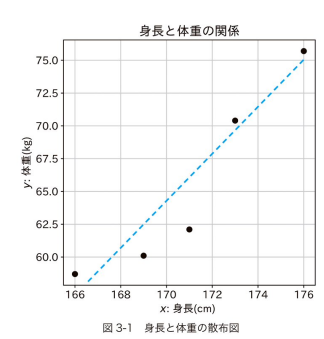 

このグラフを見ると身長と体重の間には言っての関係があるように見える．上図では点だけをプロットする散布図に対して，点線が書き込んである

線形回帰の目的は**「5つの点に最もあった1次間数を求める（上図の点線）」**ことである  

機械学習では，このように与えられた入力値（身長）から出力値（体重）を予測する関数（この場合，１次関数）を**予測関数**という



---

# 勾配降下法の実装
※ 勾配降下法の考え方については，本誌「位置No.121」を参照  
勾配降下法の実装概要を下図に示す  
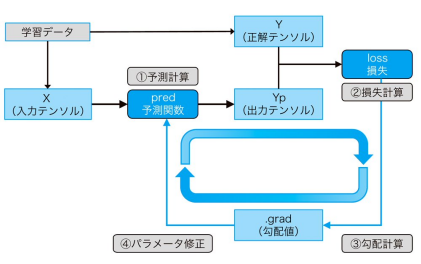



---


## ①予測計算
機械学習モデルは上図の「予測関数」predと書かれている部分に当たる  
**入力テンソルX**を入力とし，予測結果は**出力テンソルYp**に出力されるものとする  

この例では，予測関数は下記の様な1時間数となる  
$$  \mathrm{Y_p = W*X+B} $$  
予測関数によりYpを求めることを「①予測計算」と呼ぶ  
予測関数は係数Wと定数Bをパラメータに持っているので，このパラメータが変わると，「予測計算」の結果も変わる



---

## ②損失計算
「教師あり学習」において学習データは，入力と正解値の両方を含むので，正解値の例を分離して**正解テンソルY**とする  

予測結果のYpと正解のYは異なっているのが普通なので，その違いの程度を評価する目的で，この2つのテンソルを入力とする**損失Loss**を定義する  

機械学習の目標は，損失が小さくなるようなパラメータB,Wを求めることである．これは「②損失計算」に当たる  

損失関数は問題設定によって適したものを採用するが，今回は**値を予測する回帰モデル**であるため，YとYpの差の2乗を利用する．正解には，すべてのデータ系列の差を2乗して，その平均をとった関数である「**平均二乗和誤差**」を使用する



---

## ③勾配計算
予測関数を構成するパラメータを少しずつ変えながらその時の損失の変化の度合い（勾配）を調べる



---

## ④パラメータ修正
勾配値に小さな定数（**学習率**）lrをかけ，その値だけWとBを同時にずらす．これを**パラメータ修正**という



---

## データ前処理
データの前処理を行う

<br>  

- 先程示したような5組の（身長，体重）のデータを学習データとする

In [ ]:
import numpy as np
sampleData1 = np.array([
    [166, 58.7], 
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])
print(sampleData1)

<br>  

- 学習データを入力データxと正解データyに分割

In [ ]:
x = sampleData1[:, 0]
y = sampleData1[:, 1]

<br> 
 
- 可視化


In [ ]:
!pip install japanize-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib 
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

plt.scatter(x, y, c="k", s=50)
plt.xlabel("$x$: 身長(cm)")
plt.ylabel("$y$: 体重(kg)")
plt.title("身長と体重の関係")
plt.show()

<br>  

- データの変換
  - 勾配降下法では，**対象となる数値が1以内に収まるような比較的小さな値のほうが望ましい**ことがわかっている．
  - 今回のデータは，身長も体重も大きな数値なので，それぞれ平均値を引くことで，勾配降下法がやりやすい条件に変更する
    - 変換後の値は大文字のXとYで表すこととする

In [ ]:
X = x - x.mean()
Y = y - y.mean()

import matplotlib.pyplot as plt
import japanize_matplotlib 
plt.scatter(X, Y, c="k", s=50)
plt.xlabel("$X$)")
plt.ylabel("$Y$")
plt.title("加工後の身長と体重の関係")
plt.show()



---

## 予測計算
- 最初に，変換後のXとYをテンソル変数に変換する

In [ ]:
import torch
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

<br>  

- １次関数の係数にあたる変数Wと定数項にあたる変数Bもテンソル変数として定義
  - それぞれの初期値は1.0に設定する
  - W, Bは勾配降下法の対象となるためrequires_grad属性をTrueにして，自動微分を可能とする

In [ ]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

<br>  

- 予測値Ypを求める
  - $ \mathrm{Y_P = W * X + B} $

In [ ]:
# 予測関数
def pred(X):
  return W * X + B

Yp = pred(X) # 予測値の計算

# 結果表示
print(Yp)

<br>  

- 計算グラフの確認

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
from torchviz import make_dot
params = {"W": W, "B": B}
g = make_dot(Yp, params=params)
display(g)



---

## 損失計算
- 損失関数を定義する．ここではMSE(平均2乗誤差)を使用

In [ ]:
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

<br>  

- 予測値Ypと正解値Yを引数にmesを計算した結果をlossに代入（損失計算）

In [ ]:
loss = mse(Yp, Y)
print(loss)

<br>  

- 計算グラフの表示
  - ここで得られたlossは1次関数の係数Wと定数項Bの関数になっている

In [1]:
params = {"W": W, "B": B}
g = make_dot(loss, params=params)
display(g)

NameError: name 'W' is not defined

下図のように，**「損失」とは「予測関数」と「損失関数」の合成関数である**ことがわかる．つまり，「損失」は予測関数の振る舞いを決めるパラメータ（WとB）の関数になっている点が特に注意.  

この構成は，どんな複雑なモデルであっても同じ  
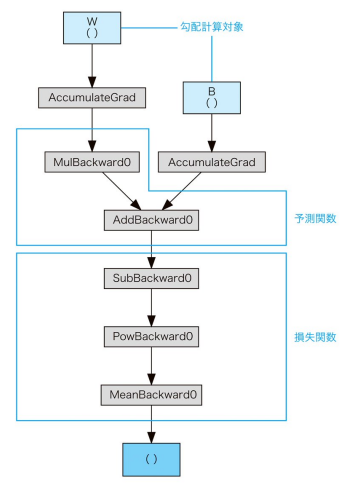



---

## 勾配計算
損失関数の準備まで終われば，勾配計算はbackward関数を呼び出すだけでOK

In [ ]:
loss.backward()
print(W.grad)
print(B.grad)



---

## パラメータ修正
勾配計算が完了したら，**その値に一定の学習率lr(0.01や0.001といった値にするのが一般的)をかけた結果を，元のパラメータから引く**のが勾配降下法の基本的な考え方
- これを，単純に実装しようとすると
```
lr = 0.001
W -= lr * W.grad
B -= lr + B.grad
```
となるが，これだとエラーが起こる．
- 理由は，勾配計算を行っている最中の変数（W, B）は他に影響が及んでしまうため勝手に値を修正できないためである

- そこで，**with torch.no_grad()というコンテキストを設定すると，そのコンテキストの内部では一時的に計算グラフ生成機能が止まり，変数の修正が可能となる**

In [ ]:
lr = 0.001
with torch.no_grad():
  W -= lr * W.grad
  B -= lr * B.grad

  # 計算済みの勾配値をリセット
  W.grad.zero_()
  B.grad.zero_()

<br>  

- パラメータと勾配値の確認
  - WとBの初期値はどちらも1.0だったので，Wは増加方向に，Bは減少方向に少し変化していることがわかる
  - また，W.grad.zero_()を使用したことで，勾配値がリセットされていることも確認できる

In [ ]:
print(W)
print(B)
print(W.grad)
print(B.grad)

## 繰り返し計算
これまでに説明した一連の流れを繰り返し計算するように設定する
- 初期化

In [ ]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500 # 繰り返し回数

lr = 0.001

history = np.zeros((0, 2)) # 記録用配列初期化

<br>  

- ループ処理
  - 基本的には，これまでに記述した内容と同じ
  - 学習曲線を表示するための「損失の記録」（今回の場合，10回に1回）を行っている

In [ ]:
for epoch in range(num_epochs):
  Yp = pred(X) # 予測計算
  loss = mse(Yp, Y) # 損失計算

  # 勾配計算
  loss.backward()

  with torch.no_grad():
    # パラメータ修正
    W -= lr * W.grad
    B -= lr * B.grad

    # 勾配値の初期化
    W.grad.zero_() 
    B.grad.zero_()
  
  # 損失の記録
  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f"epoch = {epoch} loss = {loss: .4f}") 



---

## 結果の評価
色々な角度から結果を評価する
- WとBの最終的な値と，損失の開始時，終了時の値を表示

In [ ]:
# パラメータの最終値
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

# 損失の確認
print(f"初期状態：　損失：{history[0,1]:.4f}")
print(f"最終状態：　損失：{history[-1,1]:.4f}")

<br>  

- 損失の減り方をグラフでも確認

In [ ]:
plt.plot(history[:, 0], history[:, 1], "b")
plt.xlabel("繰り返し回数")
plt.ylabel("損失")
plt.title("学習曲線（損失）")
plt.show()

<br>  

- 直線の式を求める
  - 最終的なWとBの値から直線の式を求め，散布図に重ね書きする

In [ ]:
# xの範囲を求める(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 対応するyの予測値を求める
Y_range = pred(X_range)
print(Y_range.data)

In [ ]:
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工後)')
plt.show()

上記のグラフを平均値を引き算しているので，(X,Y)から元の(x,y)に戻す

In [ ]:
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

In [ ]:
# グラフ描画

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工前)')
plt.show()



---

## 最適化関数の利用
先程はWとBの値の変更をコードで直接行っていたが，普通の機械学習モデルでは，**「最適化関数」と呼ばれる関数を経由して変更**する
- 初期化部分の変更
  - 追加部分をみると，**SGDというクラスのインスタンスを生成し，optimizerという変数に保存している．これが，「最適化関数」に該当**し，後ほど繰り返し処理で利用する
  - SGDというクラスのアルゴリズムは最もシンプル

In [ ]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500 # 繰り返し回数

lr = 0.001

# ----------追加-----------------
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)
# -------追加ここまで-------------

history = np.zeros((0, 2)) # 記録用配列初期化

<br>  

- ループ部分の変更
  - 先程はWとBの値を直接変更していた部分が，step関数呼び出しに変わっている．これが **「最適化関数を利用してパラメータ値を間接的に変更する」** ということ
  - 勾配値の初期化に関してもzero_grad()関数を呼び出すことで，先程よりもシンプルに実現している

In [ ]:
for epoch in range(num_epochs):
  Yp = pred(X) # 予測計算
  loss = mse(Yp, Y) # 損失計算

  # 勾配計算
  loss.backward()

  # --------変更後--------------
  # パラメータ修正
  optimizer.step()

  # 勾配値初期化
  optimizer.zero_grad()
  #---------変更後ここまで-------
  
  # ----------変更前------------------
  """
  with torch.no_grad():
    # パラメータ修正
    W -= lr * W.grad
    B -= lr * B.grad

    # 勾配値の初期化
    W.grad.zero_() 
    B.grad.zero_()
  """
  #----------変更前ここまで--------------
  
  # 損失の記録
  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f"epoch = {epoch} loss = {loss: .4f}") 

<br>  

- 結果の評価
  - 結果を見てみると，**値が修正前とまったく同じ**ことが確認できる．
  - これは，**SGDという最適化関数をデフォルト値で利用することは，下記の計算式でパラメータを変更するのと同じ**
  ```
  with torch.no_grad():
      # パラメータ修正
      W -= lr * W.grad
      B -= lr * B.grad
  ```

In [ ]:
# パラメータの最終値
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

# 損失の確認
print(f"初期状態：　損失：{history[0,1]:.4f}")
print(f"最終状態：　損失：{history[-1,1]:.4f}")

<br>  

- 最適化関数のチューニング
  - 最適化関数を導入することで，学習に関するチューニングを簡単にできるようなる

<br>  

- 最適化関数のチューニング版
  - `optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)`でmomentum=0.9というオプションを設定

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizerとしてSGD(確率的勾配降下法)を指定する
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# 記録用配列初期化
history2 = np.zeros((0, 2))

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)
    
    # 損失計算
    loss = mse(Yp, Y)

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()
    
    #勾配値初期化
    optimizer.zero_grad()
        
    # 損失値の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

<br>  

- 最適化関数チューニング前後の学習曲線の比較
  - チューニングを行ったあとの方が，学習の速度が早くなっていることがわかる
  - SGDという最適化関数のクラスでは，momentumと呼ばれる学習を早くするアルゴリズムが組み込まれていて，パラメータ値を指定するだけでそのアルゴリズムが使える．
  - 機械学習，ディープラーニングのチューニング技法の一つが最適化関数の選択
  - **最適化関数，あるいはそのパラメータ値の変更によるアルゴリズムの最適化が簡単にできる**ということが最適化関数を利用することによるもう一つのメリット

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='デフォルト設定')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線(損失)')
plt.show()

# 4章　予測関数の定義

# 機械学習アルゴリズムの全体像と予測関数  
前章の実装概要を再確認する
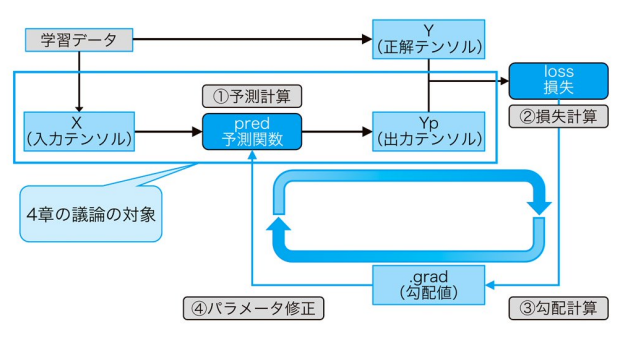

前章の線形回帰の機械学習モデルと，ディープラーニングを比べると，**本質的な違いは予測関数の内部構造にある**  

PyTorchでは，予測関数を細かい機能に分け，機能の1つひとつに対応する部品を用意し，その部品を組み合わせることで複雑な関数を作る方法（ビルディングブロックという）を採用  

このとき利用する部品をPyTorchでは「Layer」または「モジュール」という本書ではこの部品を「**レイヤー関数**」という  

前章で消化したモデルは  
$$\mathrm{Y_p=W*X+B}$$
という線形関数が予測関数になる．
  
これを図で示すと下図になる  
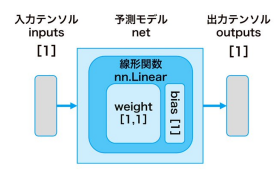

<br>  
ニューラルネットワークとPyTorchのプログラミングの対応は下図の用になる  

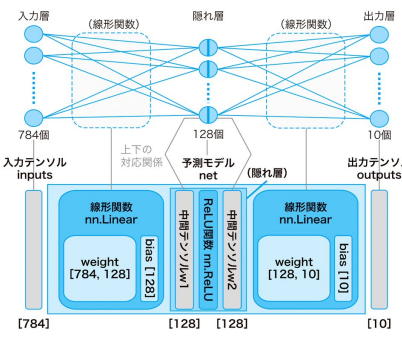



---

# PyTorchプログラミングにおける用語定義
## レイヤー関数
テンソルを入力とし，テンソルを出力とする関数群  

PyTorchのオンラインドキュメントではReLU関数のような活性化関数はレイヤー関数として定義されていないが，本書では特に区別せず活性化関数もレイヤー関数の一種として取り扱う  

今回の定義では，「線形関数」と「ReLU関数」がレイヤー関数にあたる  

本書で扱う主なレイヤー関数は以下  
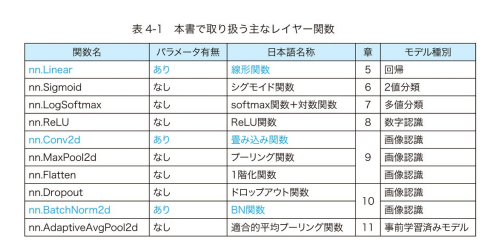

## パラメータ
**学習とはレイヤー関数のパラメータ値を調整することを意味**する  

本書で扱うレイヤー関数でパラメータを持つのは「線形関数」「畳込み関数」「BN関数」になる

## 入力テンソル
機械学習モデルを1つの関数（合成関数）とみなした場合，関数の入力となるテンソル  

ニューラルネットワークの概念では「入力層」に該当

## 出力テンソル
機械学習モデルを1つの関数（合成関数）とみなした場合，関数の出力となるテンソル  

ニューラルネットワークの概念では「出力層」に該当

## 機械学習モデル
複数のレイヤー関数を組み合わせて（1つの場合もある)，入力テンソルに対して望ましい出力テンソルを出力する合成関数

## 学習
レイヤー関数内部のパラメータ値を，望ましい出力テンソルが得られるように調整すること

# 予測関数の内部構造
- 部品となるレイヤー関数をインスタンスとして定義

In [ ]:
import torch
import torch.nn as nn

# 最初の線形関数
# 784 入力数　
# 128 出力数
l1 = nn.Linear(784, 128)

# 2番目の線形関数
# 128 入力数
# 10出力数
l2 = nn.Linear(128 ,10)

# 活性化関数
relu = nn.ReLU(inplace=True)

<br>  

レイヤ関数を組み合わせて，予測関数を実装
- 入力テンソルの最初のインデックスは常に「**複数あるデータのうち何番目のデータか**」を意味する
  - [100, 784]というshapeは「784個の要素を持つ1階テンソルのデータが100件ある」と読む
  - これは，1章で実装した合成関数の実装と同じパターン

In [ ]:
# ダミー入力データを作成
inputs = torch.randn(100, 784)

# 中間テンソル1の計算
m1 = l1(inputs)

# 中間テンソル2の計算
m2 = relu(m1)

# 出力テンソルの計算
outputs = l2(m2)

# 入力テンソルと出力テンソルのshape確認
print("入力テンソル", inputs.shape)
print("出力テンソル", outputs.shape)

<br>  

- 直線状につながる合成関数はnn.Sequentialを利用してより簡潔に実装可能
  - 結果は上コードと同じ
  - 上コードでは，m1, m2という形で見えていた中間テンソルがコードからなくなっていることが分かる
    - Pytorchプログラムでは，この中間テンソルが明示的には出てこないことが多い

In [ ]:
# nn.Sequentialを使って，全体を合成関数として定義

net2 = nn.Sequential(
    l1, 
    relu, 
    l2
)

outputs2 = net2(inputs)

# 入力テンソルと出力テンソルのshape確認
print("入力テンソル", inputs.shape)
print("出力テンソル", outputs.shape)

## 外部から見た予測関数の振る舞い
次章以降のモデルの振る舞いを下図に示す  
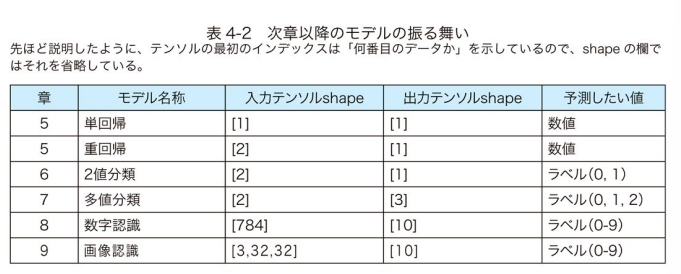

## PyTorch機械学習プログラムの全体像
PyTorchの機械学習プログラムの全体像を下図に示す  
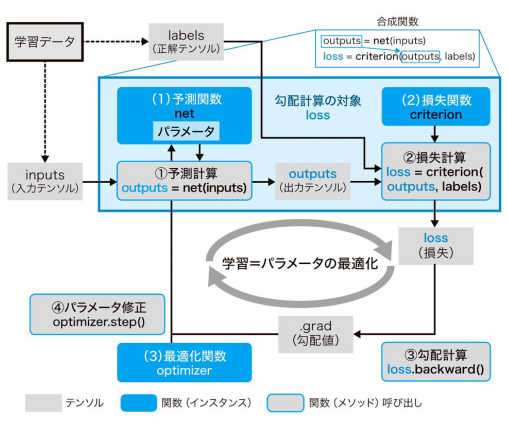

PyTorchによる機械学習プログラムでは，上図のように「(1)予測関数」「(2)損失関数」「(3)最適化関数」の3つのパートに分けることが可能  

繰り返し処理の順番でいうと「①予測計算」「②損失計算」「③勾配計算」「④パラメータ修正」を繰り返す

## 活性化関数の目的
- 学習用データ生成プログラム

In [ ]:
import numpy as np
# 訓練データ，検証データの計算
np.random.seed(123)
x = np.random.randn(100, 1)

# yの値はx^2に乱数の要素を1/10程度付加した
y = x**2 + np.random.randn(100,1) * 0.1

# データを50件ずつに分け，それぞれ訓練用，検証用とする
x_train = x[:50, :]
x_test = x[50:, :]
y_train = y[:50, :]
y_test = y[50:, :]

<br>  

- 学習データの散布図表示

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

plt.scatter(x_train, y_train, c="b", label="訓練データ")
plt.scatter(x_test, y_test, c="k", marker="x", label="検証データ")
plt.legend()
plt.show()

<br>  
下図に，  
「線形回帰モデルで2次関数を近似した結果」  

「活性化関数なしの疑似ディープラーニングモデルで2時間数を近似した結果」  

「活性化関数ありのディープラーニングで2次関数を近似した結果」  

を示す  
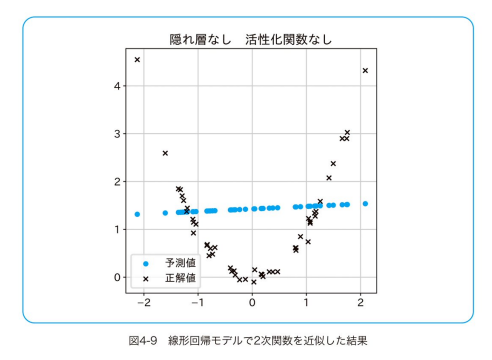  
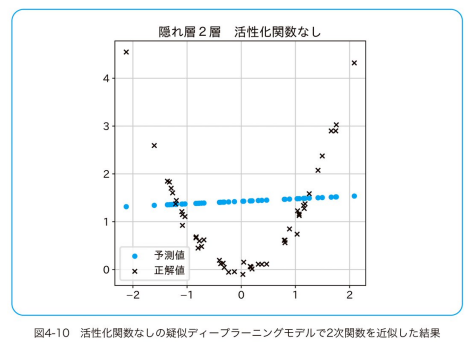   
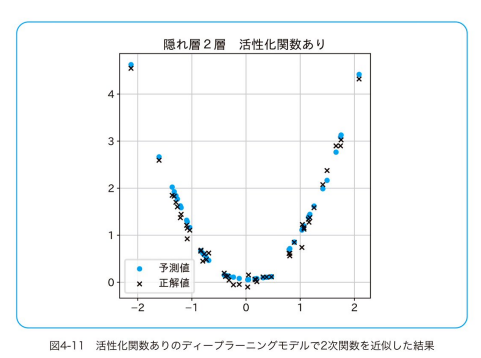

- 「線形回帰モデルで2次関数を近似した結果」
  - 1次関数による近似なので，元の2次関数をむりやり近似しようとしているので直線になってしまっている

- 「活性化関数なしの疑似ディープラーニングモデルで2次間数を近似した結果」
  - **単に線形関数を合成しただけの関数は，結局1階層の線形関数と同じである**ことが数学的に証明されているため，うまく近似できない

- 「活性化関数ありのディープラーニングで2次関数を近似した結果」
  - 2次関数の正解値がきれいに近似できている
  - **「非線形関数」である活性化関数を線形関数の間に入れることで，初めて深い階層のディープラーニングモデルが意味を持つ**（これが，活性化関数の役割）

<br>  
- 活性化関数のもう1つの役割
  - モデル出力の最終段において活性化関数を置いて，**線形関数の出力値を整形**する
  - 具体的には，
    - **2値分類モデルでは「シグモイド関数」**
    - **多値分類モデルでは「softmax関数**」  

    を利用して，**モデル出力値を0～1の値を持つ「確率値」にする**

# 5章　線型回帰

# 問題の定義
今回は，「ボストン・データセット」を使用する  

最初に，入力項目のうち「平均部屋数」を意味するRMという項目を使って，目的変数に当たる不動産価格を予測する，「**単回帰**」モデルを作成する．今回の場合，より正確には「線形単回帰」となる  

後半では，「低所得者率」を意味するLSTATという項目を追加し，2入力1出力のモデルを作成する．このようなモデルを「**重回帰**」と呼ばれる  

両者をあわせて，「**線形回帰**」と呼ぶ

# 線形関数（nn.Linear）
- 線形関数のインスタンスを生成
  - 最初の引数は「入力テンソルの次元」，次の引数が「出力テンソルの次元」を意味する

In [ ]:
import torch
import torch.nn as nn

# 入力2, 出力3の線形関数の定義
l3 = nn.Linear

## 1入力1出力
- 1入力1出力の最も簡単な線形関数l1を作成

In [ ]:
# 乱数の種固定
torch.manual_seed(123)

# 入力1, 出力1の線形関数の定義
l1 = nn.Linear(1, 1)

# 線形関数の表示
print(l1)

<br>  

- 変数l1内のパラメータをしれバル
  - レイヤー関数には，named_parametersという関数があり，この関数を呼び出すと（パラメータ名，パラメータ参照）のリストを返してくれる
    - 確認すると，[1, 1]というshapeをもつ変数weightと[1]というshapeを持つ変数biasがあることが分かる
    - 今回は，入力，出力ともに1次元なので本来はweightもbiasもスカラーで問題ないはずだが，入力，出力テンソルの次元数が2次元以上に増えたときにも簡単に拡張できるように，[1,1], [1]という行列及び，ベクトルになっている
    - 2つのパラメータのrequires_gradがTrueになっていることが分かる．これは**通常，レイヤー関数内のパラメータは学習対象であるため**である
    - **weightとbiasがともにランダムな値に設定されている**が，これはレイヤー関数内の変数が初期値として乱数が設定されるように予め設定されているからである
      - 今回はtorch.manual_seed関数を使用しているため，乱数の結果は毎回おなじになる

In [ ]:
for param in l1.named_parameters():
  print("name :", param[0])
  print("tensor :", param[1])
  print("shape :", param[1].shape)

<br>  

- 上記ではパラメータが乱数で設定されているが，明示的な値を設定したい場合，nn.init.constant_を呼び出せば良い
  - 下記では，weight=2.0, bias=1.0で設定
  - これは $y=2x+1$にあたる

In [ ]:
# 初期値設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

<br>  

- テスト用変数xの準備
  - Nump**y配列をテンソル変数に変換する前に，floatに変換している**ことに注意
    - これをしないとdoubleとして扱われることになり，その状態で線形関数をよぶとエラーになる（2章でも解説済）
  - **入力変数xが1次元テンソルなのに対して，shapeを[5, 1]の2次元テンソルに変換**している
    - これは，weightが[1, 1]の行列になっているのでそれに合わせるため

In [ ]:
import numpy as np
# テスト用データ生成

x_np = np.arange(-2, 2.1, 1) # numpy
 
x = torch.tensor(x_np).float() # numpy -> テンソル

x = x.view(-1, 1) # サイズを（N,1）に変更

print(x.shape)
print(x)

<br>  

- 1次間数のテスト
  - $y=2x+1$に入力値$x$を代入してみると，正しく予想できていることが確認できる

In [ ]:
y = l1(x)

print(y.shape)
print(y.data)



---


## 2入力1出力
次に，2入力1出力の線形関数を作成する（重回帰）  

- インスタンス生成
  - 今回の場合，それぞれの重みの初期値を1.0としているので，今回の関数は  
  $y = x_1 + x_2 + 2$　となる

In [ ]:
# 入力2, 出力1の線形関数の定義
l2 = nn.Linear(2, 1)

# 初期値設定
nn.init.constant_(l2.weight, 1.0)

<br>  

- テスト用テンソルの準備
  - 入力テンソルは列が2つの2次元テンソルとなる
  - ここでは，4行2列のテストデータを準備

In [ ]:
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

<br>  

- 関数の計算結果
  - 関数の式は$y=x_1+x_2+2$なので，($x_1, x_2$)に(0,1)や(1,1)を代入した結果通りの答えが得られている

In [ ]:
# 関数値計算
y2 = l2(x2)

print(y2.shape)
print(y2.data)



---


## 2入力3出力
最後に，出力を3に増やしてみる

In [ ]:
# 入力2 出力3の線形関数の定義
l3 = nn.Linear(2, 3)

# 初期値設定
nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

<br>  

- 関数のテスト
  - 入力には先ほど用意したx2を使用
  - 入力テンソルx:[4, 2], 重み行列l3.weight: [3,2], バイアスl3.bias: [3]
  - 計算式は以下となる  （入力×重み）
  $$
  \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}=\begin{bmatrix} 0 & 0 &0 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \\ 2 & 4 & 6 \end{bmatrix}
  $$  
  これにバイアスを足して
  $$
  \begin{bmatrix} 0 & 0 & 0 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \\ 2 & 4 & 6 \end{bmatrix} + \begin{bmatrix} 2 \\ 2 \\ 2 \\ 2 \\ \end{bmatrix} = \begin{bmatrix} 2 & 2 & 2 \\ 3 & 4 & 5 \\ 3 & 4 & 5 \\ 4 & 6 & 8 \end{bmatrix}
  $$

In [ ]:
y3 = l3(x2)

print(y3.shape)
print(y3.data)



---

# カスタムクラスを利用したモデル定義
Pytorchによる機械学習プログラムの全体像は  

(1)予測関数(2)損失関数(3)最適化関数   

に分けられるが，「**カスタムクラスによるモデル定義**」は**(1)予測関数**に関わる箇所となる  

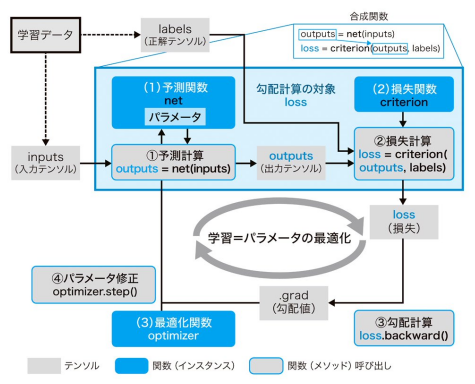

<br>  

本章で構築する機械学習モデルのコードの一番本質的な部分を以下コードに示す  
- カスタムクラス定義によりNetという名前のクラスを作成
- Netというクラスの**親クラスはnn.Module**
- クラスの内部には**forward関数**が定義され，この関数で予測処理を実装

In [ ]:
# モデルの定義
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    # 親クラス nn.Moduleの初期化呼び出し
    super().__init__()

    # 出力層の定義
    self.l1 = nn.Linear(n_input, n_output)
  
  # 予測関数の定義
  def forward(self, x):
    x1 = self.l1(x) # 線形回帰
    return x1

<br>  

- カスタムクラスを使用した予測
  - **カスタムクラスのインスタンス変数netは自分自身が関数として働く**（1章参照）
  - 予測をするときは必ずこのコードが出てくる

In [ ]:
# ダミー入力
inputs = torch.ones(100, 1)

# インスタンス生成
n_input = 1
n_output = 1
net = Net(n_input, n_input)

# 予測
outputs = net(inputs)



---

# データ準備
- データセットをscikit-learnライブラリから呼び出し

In [ ]:
# 学習用データ準備

from sklearn.datasets import load_boston

# データ読み込み
boston = load_boston()

# 入力データと正解データ取得
x_org, yt = boston.data, boston.target

# 各項目名リスト取得
feature_names = boston.feature_names

print("元データ", x_org.shape, yt.shape)
print("項目名", feature_names)

<br>  

- 入力データから「平均部屋数（RM）」のみを抜き出す

In [ ]:
# データ絞り込み（項目RMのみ）
x = x_org[:, feature_names == "RM"]
print("絞り込み後", x.shape)
print(x[:5, :])

print("正解データ")
print(yt[:5])

<br>  

- 絞り込みで取得したxと正解値ytの関係を散布図で描画
  - 描画された結果を見ると，散布図に示された多くの点を一番よく近似している直線を求める**線形単回帰**となる

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()



---

# モデル定義
- 変数を定義
  - 機械学習，ディープラーニングのモデルは「**入力ベクトルに対して出力ベクトルを返す関数**」といえる．今回の場合，「**入力inputsに対して出力outputsを返す機械学習モデルnet**」となる
  - 各変数は以下の意味を示す
    - n_input : 入力inputsの次元数
    - n_output : 出力outputsの次元数


In [ ]:
# 変数定義

# 入力次元数
n_input = x.shape[1]

# 出力次元数
n_output = 1

print(f"入力次元数： {n_input} 出力次元数： {n_output}")

<br>  

- 機械学習モデル（予測モデル）のクラス定義
  - カスタムクラスNetが，nn.Moduleの小クラスとして定義
  - \__init__関数で初期化処理
  - インスタンス生成時に，n_inputとn_outputの2つを引数として取る
  - \__init__関数の内部で親クラスの\__init__関数を呼んでいる  
  - 重みとバイアスについて
    - 「重みl1.weight」はshape=[1, 1]の2階テンソル
    - 「バイアスl1.bias」はshape=[1]の1階テンソル  
  - Pytorchでは**必ず**forward関数が必要
    - **入力テンソルinputsを入力として，出力テンソルoutputsを出力するための処理を記述する**

In [ ]:
# 機械学習モデル（予測モデル）のクラス定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):

    # 親クラスnn.Moduleの初期化呼び出し
    super().__init__()

    # 出力層の定義
    self.l1 = nn.Linear(n_input, n_output)

    # 初期値をすべて1にする
    #「ディープラーニングの数学」と条件を合わせる
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  # 予測関数の定義
  def forward(self, x):
    x1 = self.l1(x) # 線形回帰
    return x1

<br>  

- インスタンス生成

In [ ]:
# 1入力1出力の線形モデル
net = Net(n_input, n_output)

<br>  

- 入力テンソルから予測値である出力テンソルを取得

In [ ]:
outputs = net(inputs)

<br>  

- モデル内の変数表示
  - **親クラスのnn.Moduke内で定義されている関数を利用可能**
    - 下記コードでは，「モデル内の変数名とその値を取得する関数named_parameters」を使用

In [ ]:
for parameter in net.named_parameters():
  print(f"変数名：{parameter[0]}")
  print(f"変数値：{parameter[1].data}")

<br>  

- parameters関数の呼び出し
  - parametes関数では「パラメータ変数」のみが名前無しにリスト形式で返される

In [ ]:
for parameter in net.parameters():
  print(parameter)

<br>  

- モデルの概要表示1

In [ ]:
print(net)

<br>  

- モデルの概要表示2
  - summaryという関数を使用
    - 引数として「net変数そのもの」と「入力変数のサイズ」を指定
    - それぞれの層でパラメータがいくつあるかなどの情報をサマリー表示する 

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(net, (1,))

<br>   

- 損失関数と最適化関数の定義
  - 機械学習において重要な「予測関数」「損失関数」「最適化関数」のうち，**「損失関数」「最適化関数」で実装**

In [ ]:
import torch.optim as optim
# 損失関数：平均2乗誤差
criterion = nn.MSELoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)



---

# 勾配降下法
繰り返し計算により，最適なパラメータ（l1.weight, l1.bias）を求める
- 入力xと正解値ytのテンソル化
  - Pytorchでの学習では全てのデータをテンソル化する必要がある

In [ ]:
# 入力変数xと正解値ytのテンソル変数化
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

# 次元数確認
print(inputs.shape)
print(labels.shape)

<br>  

- labels変数を(N,1)次元の行列形式に変換
  - MSELossのインスタンスであるcriterion関数に予測値とともに，labelsを渡して損失を計算する．
  - **この際に，引数はN次元のベクトルではなく(N,1)次元の行列形式である必要がある**
    - **view関数を使用してデータサイズを変更**

In [ ]:
# 損失計算用に，labels変数を(N,1)次元の行列に変換

labels1 = labels.view((-1, 1))

# 次元確認
print(labels1.shape)

<br>  
ここまでで，勾配降下法適用のための準備は終了  

①　予測計算  
②　損失計算  
③　勾配計算  
④　パラメータ修正  
を繰り返すことになる  
<br>  
- ①予測計算

In [ ]:
# 予測値の計算
outputs = net(inputs)

<br>  

- ②損失計算
  - 予測結果のoutputsと正解値のlabels1を引数にして損失関数を呼び出し．lossを計算

In [ ]:
# 損失の計算
loss = criterion(outputs, labels1)

print(f"{loss.item():.5f}")

<br>  

- 計算グラフの可視化
  - make_dot関数で可視化
    - 3章ではparamsの引数を手動で指定していたが，**今回はnetオブジェクト内に入力パラメータが含まれているのでdict(net.named_parameters())というように指定可能**
    - 表示されるグラフを区分すると下図  
    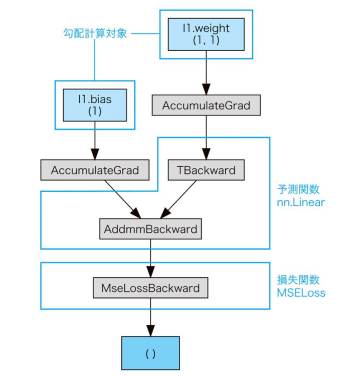

In [ ]:
  !pip install torchviz | tail -n 1

In [ ]:
from torchviz import make_dot

# 損失のグラフ化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

<br>  

- ③勾配計算
  - 上記で自動生成された計算グラフを利用して，勾配の計算を実行
  - 勾配の計算はbackward関数を呼び出すだけで可能

In [ ]:
# 予測値の計算
outputs = net(inputs)

# 損失の計算
loss = criterion(outputs, labels1)

# 勾配計算
loss.backward()

# 勾配の計算結果を取得，表示
print(net.l1.weight.grad)
print(net.l1.bias.grad)

<br>  

- ④パラメータ修正
  - パラメータ（weight, bias）を修正
  - 最適化関数を用いる場合は，step関数で実装

In [ ]:
# パラメータの修正
optimizer.step()

# 重みとバイアスが変わっていることを確認
print(net.l1.weight)
print(net.l1.bias)

<br>  

- 勾配値の初期化
  - backward関数は，呼び出されるたびに値が加算されるため，**パラメータの修正が終わったら忘れずに勾配値の初期化を行う**

In [ ]:
# 勾配値の初期化
optimizer.zero_grad()

# 勾配値の確認
print(net.l1.weight.grad)
print(net.l1.bias.grad)

<br>  

- 繰り返し計算
  - ①～④を繰り返して，最適なパラメータを見つける
- 初期化

In [ ]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

<br>  

- 繰り返し処理実行

In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')



---

# 結果確認
- 最初の損失と，最後の損失を確認
  - 損失を記録したhistory変数の最初の行と，最後の行を確認

In [ ]:
print(f"損失初期値：{history[0,1]:.5f}")
print(f"損失最終値：{history[-1,1]:.5f}")

<br>  

- 学習曲線表示

In [ ]:
# 学習曲線の表示 (損失) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

<br>  

- 学習後のモデルから生成される1次関数のグラフを表示

In [ ]:
# 回帰直線の算出

# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

In [ ]:
# 散布図と回帰直線の描画

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()



---

# 重回帰モデルへの拡張
入力項目にLSTATを追加し，2入力としたモデルを生成

In [ ]:
# 列（LSTAT:低所得者率）の追加

x_add = x_org[:, feature_names == "LSTAT"]
x2 = np.hstack((x, x_add))

print(x2.shape)
print(x2[:5, :])

<br>  

- モデルインスタンスを生成し直す

In [ ]:
# 今回は入力データの次元数n_inputは2
n_input = x2.shape[1]
print(n_input)

# モデルインスタンスの生成
net = Net(n_input, n_output)

<br>  

- netのパラメータを確認1
  - netインスタンスで使用可能なnamed_parameters関数を呼び出して確認
  - biasには変化がないが，weightの要素数が2個に増えていることが分かる

In [ ]:
# predict.weightが2次元に変わったことを確認

for parameter in net.named_parameters():
  print(f"変数名：{parameter[0]}")
  print(f"変数値：{parameter[1].data}")

<br>  

- netのパラメータを確認2
  - printで確認
  - in_featureが1から2に変わっていることが分かる

In [ ]:
print(net)

<br>  

- netのパラメータを確認3
  - summary関数で確認
  - paramの欄を確認すると，パラメータが2から3に変わっている（weight2個，bias1個）ことが分かる

In [ ]:
from torchsummary import summary
summary(net, (2,))

<br>  

- 入力変数の再定義

In [ ]:
# 入力変数x2のテンソル変数化
inputs = torch.tensor(x2).float()

<br>  

- 初期化，繰り返し
  - 入力数1の時とまったく同じコード
  - **損失関数の値がinf→nanになっていることが分かる**
    - **繰り返し計算がうまく行っていない**
    - 今回の場合，学習率の値が0.01が大きすぎたことが原因

In [ ]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')



---

# 学習率の変更
- 初期値の値だけを変更して同じプログラムを実行
  - エポック数：50000→2000
  - 学習率：0.01→0.001

In [ ]:
# 学習率
lr = 0.001

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 2000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

<br>  

- 最初の損失と最後の損失を比較
  - **1入力の場合の損失が21.8程度だったので，今回のほうがより良い近似になっている**ことが分かる

In [ ]:
print(f"損失初期値：{history[0,1]:.5f}")
print(f"損失最終値：{history[-1,1]:.5f}")

<br>  

- 学習曲線を表示
  - 学習曲線に置いても，今回のほうがきれいに学習できていることが分かる．**このことから学習率lrが重要であることが分かる**

In [ ]:
# 学習曲線の表示 (損失) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()



---

# コラム  
- なぜforward関数で予測できるのか
  - 学習モデルの親クラスである**torch.nn.Moduleクラス内で，\__call__関数が定義されている**ので，モデルのインスタンス変数netはnet(inputs)のように関数として振る舞うことができている
  - v1.3.0の「torch.nn.Moduleクラス」の「\__call__関数内」を確認する(https://github.com/pytorch/pytorch/blob/v1.3.0/torch/nn/modules/module.py)  
  ```
      def __call__(self, *input, **kwargs):
        for hook in self._forward_pre_hooks.values():
            result = hook(self, input)
            if result is not None:
                if not isinstance(result, tuple):
                    result = (result,)
                input = result
        if torch._C._get_tracing_state():
            result = self._slow_forward(*input, **kwargs)
        else:
            result = self.forward(*input, **kwargs)
        for hook in self._forward_hooks.values():
            hook_result = hook(self, input, result)
            if hook_result is not None:
                result = hook_result
        if len(self._backward_hooks) > 0:
            var = result
            while not isinstance(var, torch.Tensor):
                if isinstance(var, dict):
                    var = next((v for v in var.values() if isinstance(v, torch.Tensor)))
                else:
                    var = var[0]
            grad_fn = var.grad_fn
            if grad_fn is not None:
                for hook in self._backward_hooks.values():
                    wrapper = functools.partial(hook, self)
                    functools.update_wrapper(wrapper, hook)
                    grad_fn.register_hook(wrapper)
        return result
  ```  
  上記コードの一部分を抜粋する．下記の部分で，forward関数を呼び出している事がわかる．
  ```
  else:
    result = self.forward(*input, **kwargs)
  ```

# 6章　2値分類

# 問題の定義
本章では，「アイリス，データセット」と呼ばれる公開データセットを利用して分類を行う．  

モデルの概要を下図に示す  
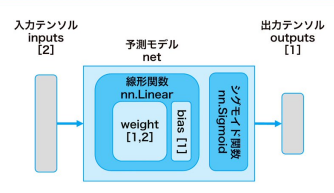

5章の線形回帰モデルの概要図と比較すると，後段のシグモイド関数が新たに加わっていることが分かる  
アルゴリズムの名称としては，「**2値ロジスティック回帰モデル**」と呼ばれる



---

# 本章で学ぶ重要概念
「分類」モデルは「**精度**」という指標値を導入することにより「回帰」モデルよりも**モデルの性能を判断しやすい**  

「精度」と関連して，「**訓練データと検証データの分割**」という考え方も出てくる  

前章の線形回帰モデルでは，「**1次関数による予測**」と「**2次関数による損失評価**」がでてきた  
本章では，「**シグモイド関数**」と「**交差エントロピー誤差**」という道具を使用する



---

# 精度（Accuracy）
前章の線形回帰モデルでは，正解値と予測値の差が小さいのが良いモデルであり，その尺度を数値化する損失関数が定義できた．  
しかし，この損失関数の値がいくつならば，良いモデルといえるかどうかの明確な基準を決めるのは困難（$R^2$という評価指標が存在するが，非常に高度な数学知識が必要）  

本章でとりあげる2値モデルは「正解値，予測結果ともに1か0の値しかない」ため予測結果が正解かどうかを1件ごとに明確に判断可能  

**（正解件数）/（全体件数）によってモデルがどの程度の比率で正しく予測できているかを数値化できる**．この値を機械学習では「**精度（Accuracy）**」と呼ぶ  

2値分類モデルにおける精度の考え方のイメージを下図に示す  
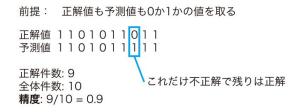



---

# 訓練データと検証データの分割
機械学習，特にディープラーニングに置いて学習用データのみに精度がよく，それ以外のデータに対して，制度が良くない状態を「**過学習**」と呼ぶ．  

過学習対策として最もわかりやすいものが「**訓練データと検証データの分割**」となる  

下図に学習データの分割のイメージを示す  
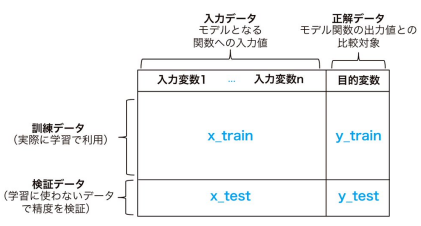

学習データを分ける比率にルールはないが，訓練：検証を7:3や6:4にすることが多い  

分離した検証データは，作ったモデルの精度を評価する目的で利用する．  
精度検証処理の流れを下図に示す  

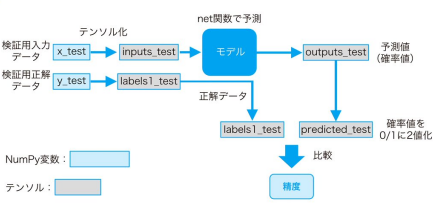

<br>  
下図は，ある学習モデルの訓練データと検証データの両方の学習曲線を重ねたものである．  

青線の訓練データが繰り返し回数を増やすと精度がよくなっているのに対して，**黒線の検証用データでは繰り返し回数が40回程度に達すると頭打ちになって精度が向上していないことが分かる**．これが過学習である  

この場合，**繰り返し回数を40回程度で打ち切ることが過学習対策として正しい**ということになる  

このように過学習をチェックするには，検証データを事前に準備しておくことが重要となる  

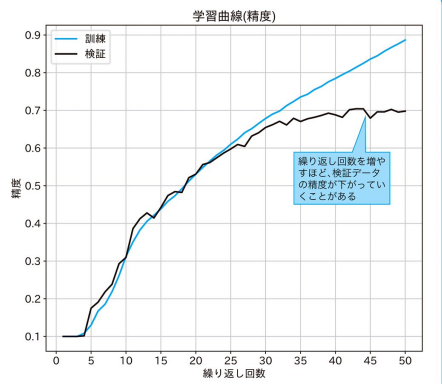



---

# シグモイド関数
- シグモイド関数のグラフを表示
  - PyTorchではシグモイド関数をtorch.sigmoid関数で使用可能
  - シグモイド関数を数式で表すと以下．ここでexp(x)は，自然定数を底とする指数関数を意味する  
  $$ f(x)=\frac{1}{1+exp(-x)}$$
  - グラフと数式より，シグモイド関数の性質は以下
    - 常に値が増加し続ける（単純増加関数）
    - 0から1の間の値をとる
    - x=0のときの値は0.5
    - グラフは点(0, 0.5)に関して点対称
  - **上記の性質は関数値を「確率」として利用するのに最適**
  - この性質を利用することで，下図の2値分類モデルの予測の仕組みが実装される 
    - 線形関数を得るところまでは，前章の線形回帰モデルと同じ．
    - 出力uに対してシグモイド関数をかけて，確率値を取得する箇所が異なる
    - f(u)の値は0から1の間なので，この値が0.5より大きい場合は予測結果が1であると解釈する
    - 最終的な，出力は0,1の二値であるが，**勾配降下法がパラメータを微小に変化させていくため，予測値も微小に変化させる必要がある**．そのため，**最終的な出力である0,1の前に確立値を挟む**という操作を行う  
  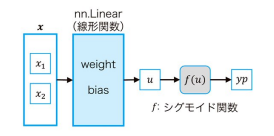

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# NumPy配列でxデータを定義
x_np = np.arange(-4, 4.1, 0.25)

# データをTensor形式に変換
x = torch.tensor(x_np).float()

# yの値を計算
y = torch.sigmoid(x)

# グラフ描画
plt.title('シグモイド関数のグラフ')
plt.plot(x.data, y.data)
plt.show()



---

# 交差エントロピー誤差
線形回帰では損失関数が2次関数であったが，分類モデルでは「**交差エントロピー誤差**」を使用する  

最初に，シグモイド関数の出力として得られる確率値は厳密に言うと「**入力データに対して分類結果が1になる確率**」  

2値分類の場合，正解地は1か0なので「分類結果が1になる確率」が$f(u)$なら，「分類結果が0になる確率」は$1-f(u)$で表される  

5つのデータ系列に対して1次関数の結果がそれぞれ$u_1, u_2, u_3, u_4, u_5$で，正解値が$yt_1=1, yt_2=0, yt_3=0, yt_4=1, yt_5=0$の場合を例にすると，**「モデル確信度」（分類結果が正解の確率）**は，それぞれ  
$$f(u_1), 1-f(u_2), 1-f(u_3), f(u_4), 1-f(u_5)$$
となる  

ここで損失関数に最尤推定という考え方を導入する  
これは，「**すべてのデータに対する確信度を掛け合わせた結果を最大にするパラメータが一番もっともらしいので採用する**」という考え方  

つまり，上の5つのモデル確信度を例にすると，下記の関数を最大にするパラメータを探すこととなる  
$$f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5)$$  

上記の式は，積なので**対数を取ることで和の形に変更**する（和の形の方が計算速度が早い）  
$$\log(f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5))\\
=\log(f(u_1) + 1-f(u_2)+ 1-f(u_3)+ f(u_4)+ 1-f(u_5))$$  

さらに，次の変形を行うと確信度の組み合わせが変わった場合でも，場合分けすることなく対数を表現可能  
$$yt_i \cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$
上記式に，$yt_i=1$，$yt_i=0$をそれぞれ代入すると確認できる  

すると，上式（対数尤度関数）は次のようになる  
$$\sum_{i=1}^{5} yt_i\cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$  
この式の値は「**5件のデータの確信度の積が最も大きいとき（＝全てのデータの予測値と正解値が一致した時）最大になる**」  
**損失関数はできるだけ小さくすることが目標なので，この式にマイナスをかける**  

さらに，この式をデータ件数で割って平均をとったものが**交差エントロピー関数**と呼ばれ，2値分類モデルの損失関数として利用される  

Pytorchで，交差エントロピー関数を利用する場合，**nn.BCELoss**というクラスを利用する  





---

# データ準備
- データ読み込み
  - scikit-learnライブラリを利用してデータを読み込み，入力データと正解データのshapeを確認

In [ ]:
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

print("元データ", x_org.shape, y_org.shape)

<br>  

- データ絞り込み
  - アイリス・データセットは元々150行のデータがあるが，これを先頭から100行に限定すると，正解値がSetosa, Versicolourのみのデータになる
  - xの列方向も最初の2列のみ（がく片spalの長さと幅）に絞り込む

In [ ]:
# データ絞り込み
# クラス0, 1のみ
# 項目 sepal_lengthとsepal_widthのみ

x_data = iris.data[:100,:2]
y_data = iris.target[:100]

print("対象データ", x_data.shape, y_data.shape)

<br>  

- 訓練データと検証データへの分割
  - 分割にはscikit-learnのtrain_test_splitを使用
  - **順番を変えずに分割すると，データに偏りが出てしまうが，同時にシャッフルもしているので，その心配はない**
  - random_stateパラメータを指定すると，シャッフルする際の乱数のための固定値になるので，分割結果も同じになる

In [ ]:
# 元のデータサイズ
print(x_data.shape, y_data.shape)

# 訓練データ，検証データに分割（シャッフルも同時に実施）
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

<br>  

- 散布図表示
  - 散布図を見ると，四角形の対角線あたりに直線を引くことでちょうど2つのグループに分割ができそうなので，以降の学習で最適な直線を見つける

In [ ]:
# 散布図の表示

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()



---

# モデル定義
- 入力次元数と出力次元数を定義

In [ ]:
# 入力次元数（今回は2）
n_input = x_train.shape[1]

# 出力次元数
n_output = 1

print(f"n_input: {n_input} n_output:{n_output}")

<br>  

- モデルの定義
  - forward関数を見ると，入力テンソルを線形関数にかける．**その結果に対して，さらにシグモイド関数をかけたものを出力としている**箇所が前章の線形回帰モデルと異なる

In [ ]:
import torch.nn as nn

# モデルの定義
# 2入力，1出力のロジスティック回帰モデル

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)
    self.sigmoid = nn.Sigmoid()

    # 初期値を全部1にする
    # 「ディープラーニングの数学」と条件を合わせる
    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  # 予測関数の定義
  def forward(self, x):
    # 最初に入力値を線形関数にかけた結果を計算
    x1 = self.l1(x)
    # 計算結果にシグモイド関数をかける
    x2 = self.sigmoid(x1)
    return x2

<br>  

- インスタンス生成

In [ ]:
# インスタンスの生成

net = Net(n_input, n_output)

<br>  

- モデルのパラメータ確認

In [ ]:
# モデル内のパラメータの確認
# l1.weightとl1.biasがあることがわかる

for parameter in net.named_parameters():
    print(parameter)

<br>  

- モデルの概要表示
  - 線形関数（nn.Linear）の後にシグモイド関数が追加されている

In [ ]:
# モデルの概要表示

print(net)

<br>  

- モデルのサマリー表示
  - 線形関数（nn.Linear）の後にシグモイド関数が追加されている

In [ ]:
!pip install torchinfo | tail -n 1

In [ ]:
from torchinfo import summary
# モデルのサマリー表示

summary(net, (2,))

<br>  

- 最適化アルゴルズムと損失関数の定義
  - 前章の線形回帰の時と異なり「交差エントロピー関数」を損失関数として定義している

In [ ]:
import torch.optim as optim
# 損失関数：交差エントロピー関数
criterion = nn.BCELoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)



---

# 勾配降下法
- 入力データと正解データのテンソル化
  - 今回は，訓練に使うinputsとlabelsだけでなく，検証に使うinputs_testとlabels_testも精度評価用に準備
  - 損失関数BCELossを利用する場合，正解データとしての第2引数は，第1引数とshapeがそろっている必要がある

In [ ]:
# 入力データx_trainと正解データy_trainのテンソル化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

# 正解データをN行1列に変換
labels1 = labels.view((-1, 1))

# 検証データのテンソル化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

# 検証用の正解データもN行1列の行列に変換
labels1_test = labels_test.view((-1, 1))

<br>  

- 損失の計算グラフを表示
  - 計算グラフを区分けすると下図になる  
  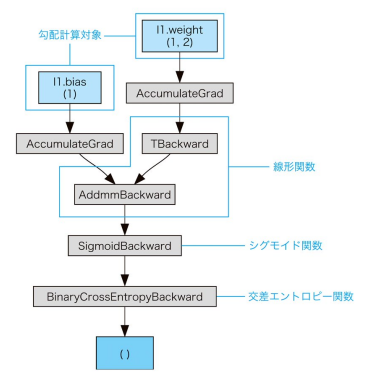

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
from torchviz import make_dot
from IPython.display import display
# 予測計算
outputs = net(inputs)

# 損失計算
loss = criterion(outputs, labels1)

# 損失の計算グラフ化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

<br>  

- 初期化処理
  - 一番下のhistory変数が，前章の2列から5列に増加
    - 第1要素：繰り返し数
    - 第2要素；訓練データの損失
    - 第3要素：訓練データの精度
    - 第4要素：検証データの損失
    - 第5要素：検証データの精度

In [ ]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数：交差エントロピー関数
criterion = nn.BCELoss()

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 記録用リストの初期化
history = np.zeros((0,5))

<br>  
メインループ
- 訓練フェーズ  
  - 
  ```
  train_loss = loss.item()
  ```
  で，損失をスカラー化してtrain_lossに保存  
  
  - 
  ```
  predicted = torch.where(outputs < 0.5, 0, 1)
  ```
  で，モデル出力の確率値が0.5より大きいかどうかで，予測値が1か0かを判定

  - 
  ```
  train_acc = (predicted == labels1).sum() / len(y_train)
  ```
  で精度（（正解件数）/（全体件数））を計算  
<br>  
- 予測フェーズ
  - 以下以外は訓練フェーズと同じ
    - 対象データが検証データに変更
    - 学習はしないので，「勾配計算」「パラメータ修正」のステップがなくなって

In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    # 訓練フェーズ ----------------------------------------
    
    #勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels1)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 損失の保存(スカラー値の取得)
    train_loss = loss.item()

    # 予測ラベル(1 or 0)計算
    predicted = torch.where(outputs < 0.5, 0, 1)
    
    # 精度計算
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 予測フェーズ ---------------------------------------------------

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels1_test)

    # 損失の保存（スカラー値の取得）
    val_loss =  loss_test.item()
        
    # 予測ラベル(1 or 0)計算
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 精度計算
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))




---

# 結果確認
- 損失と精度の確認

In [ ]:
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

<br>  

- 学習曲線の確認（損失）

In [ ]:
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

<br>  

- 学習曲線の確認（精度）

In [ ]:
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>  

- 決定境界の描画
  - 今回のロジスティック回帰モデルでは2つの分類結果の境界になる直線が存在するが，これを「**決定境界**」と呼ぶ

In [ ]:
# 検証データを散布図用に準備

x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

In [ ]:
# パラメータの取得

bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

# 決定境界描画用 x1の値から x2の値を計算する
def decision(x):
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# 散布図のx1の最小値と最大値
xl = np.array([x_test[:,0].min(), x_test[:,0].max()])
yl = decision(xl)

# 結果確認
print(f'xl = {xl}  yl = {yl}')

In [ ]:
# 散布図表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', 
        c='k', s=50, label='class 1')

# 決定境界直線
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()



---

# コラム
## BCELoss関数とBCEWithLogitsLossの違い
BCELossと似た関数にBCEWithLogitsLossがある  
下記コードは，先程のコードと同じ処理を行う  



<br>  

- forward関数を見ると，線形関数の後の**シグモイド関数の呼び出しがなくなっている**  

- criterionがBCEWithLogitsLossに変わっている  

- 以上の変更点から，2つのコードの違いを下図に示す  
  - BCEWithLogitsLossでは，「**シグモイド関数と交差エントロピー関数が一つになっている**」  
  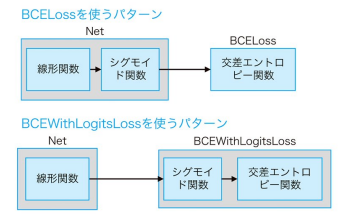  
  - BCEWithLogitsLossのパターンでは，以下のようにモデルの出力は，0より大きいかどうかで判断する．これは，**シグモイド関数からの出力0.5が，シグモイド関数への入力0と対応するため**である．
  ```
  predicted = torch.where(outputs < 0.0, 0, 1)
  ```

- 一見，このコードは分かりにくく見えるが，PyTorchでは，「**指数関数（シグモイド関数などに含まれる）と対数関数（交差エントロピー関数などに含まれる）を独立して計算すると結果が不安定になりやすいため，極力セットで計算すべき**」というポリシーがあるため，この記述方法の方が推奨される．


In [ ]:
# モデルの定義
# 2入力1出力のロジスティック回帰モデル

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
                
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)        
        
    # 予測関数の定義
    def forward(self, x):
        # 入力値と行列の積を計算する
        x1 = self.l1(x)
        return x1

In [ ]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： logits付き交差エントロピー関数
criterion = nn.BCEWithLogitsLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 記録用リストの初期化
history = np.zeros((0,5))

In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    # 訓練フェーズ
    
    #勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels1)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 損失のスカラー化
    train_loss = loss.item()

    # 予測ラベル(1 or 0)計算
    predicted = torch.where(outputs < 0.0, 0, 1)
    
    # 精度計算
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 予測フェーズ
    
    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels1_test)

    # 損失のスカラー化
    val_loss =  loss_test.item()
        
    #予測ラベル(1 or 0)計算
    predicted_test = torch.where(outputs_test < 0.0, 0, 1)

    # 精度計算
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

# 7章　多値分類

# 問題の定義
前章のアイリスデータセットを使用して，多値分類を行う  

以前は，データの種類を2種類に限定していたが，今回は，3種類すべての学習データを利用する．  

今回のモデル図を下記に示す  
モデル図を見ると，活性化関数がないことが分かる．  
これは，多値分類の際，PyTorch特有の独特な予測関数の定義方法があるためである  

理由を一言で言うと「損失関数側で吸収しているので予測関数側では不要になった」ということである  

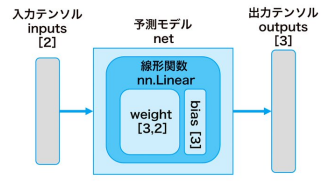



---

# 本章で学ぶ重要概念
多値分類の2値分類との大きな違いは出力数である  
多値分類では分類先グループ数をNとした時に，N次元出力となる  

これにより，2値分類で使用していたシグモイド関数が**softmax関数**という別の関数へと変わることになる  

損失関数は**同じ交差エントロピー関数を使用するが形式が少し変わる**



---

# 複数の分類器
多値分類では，Nこの出力を**N個の分類器**と考えて，それぞれの分類器の出力が**そのグループである確率**となる．  

そして，**一番確率値の大きい分類器に該当するグループがモデルとしての予測値**となる  

この考え方を下図に示す  
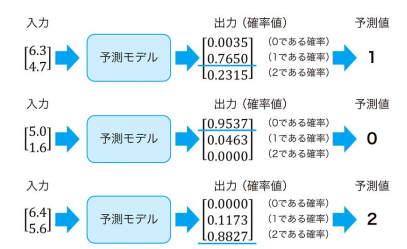



---

# 重み行列
多値分類では，出力数が1からNへと増加したので，1次関数もN個必要となる．これは，「重みベクトル」であったモデル内の変数が「**重み行列**」へと変わるということである

それぞれの重みのイメージを下図に示す  
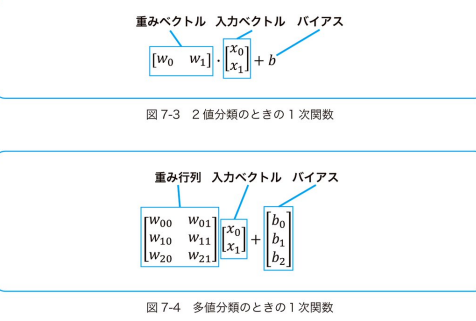



---

# softmax関数
多値分類ではsoftmax関数が活性化関数として使用される  
softmax関数の数式は以下である  
$$
y_i = \frac{\exp(x_i)}{\sum_{k=1}^{n}\exp(x_k)}
$$
softmax関数の計算例を下図に示す．また，softmax関数の全ての出力を足すと1になる．これらの出力の中で最も値が大きい出力を採用することになる．  
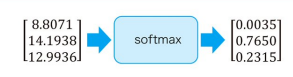



---

# 交差エントロピー関数
多値分類では，2値分類と同様に損失関数に交差エントロピー関数が使用される  

しかし，名前は同じだが式は下記のように少し異なる  
$$
\sum_{i=0}^{N-1}(yt_i\log(yp_i))
$$  
ここで，$yt_i$は正解の時に1，正解でないときに0の値を取る  

イメージ図は以下となる  

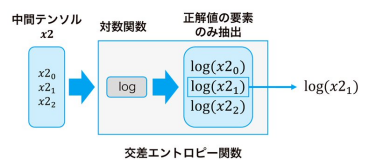  


- まず．softmax関数からの出力すべてのlogを取る  
- そして「**正解値と対応する要素のみ**を抽出する」
  - この「正解値と対応する要素のみを抽出」を行うには正解値が（0,1,2）のどれかという**整数値で与えられる必要**がある
  - よって，PyTorchでは**損失関数に渡す正解値（第2引数）は整数値から構成される値である必要**がある
    - **Kerasなどの他のフレームワークでは整数値では渡さない**ため，これはPyTorch独自の記法



---

# 多値分類モデルにおける予測関数と損失関数の関係

多値分類における「損失」がPyTorchでどのように実装されるかを下図に示す  
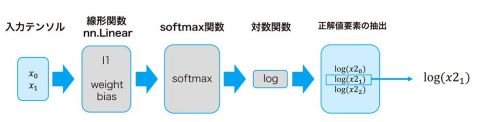  

内容としては  
- 中間テンソルは取り除く
- 前半部分では，「予測モデル」の枠を取り除いてレイヤー関数としての部品のみ残す
- 後半部分でも交差エントロピー関数という枠を取り除いて，「対数関数」「正解値要素の抽出」という操作だけ取り出す  
<br>  

ここで，図を見ると「交差エントロピー関数」に対応する損失関数がPyTorchでは実装されていないことが分かる  

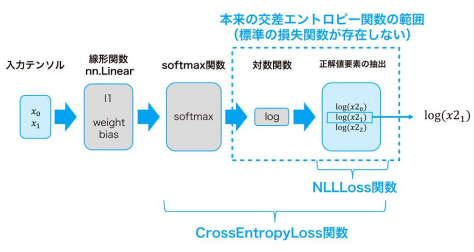  

このような実装になっている理由は，前章のコラムでも話した「対数関数を独立して使うと不安定になるので必ず指数関数（シグモイド関数やsoftmax関数）とセットで使うべき」というPyTorch特有のポリシーがあるからである．  
<br>  
よって，PyTorchで多値分類を実装する方法（自作の関数を用いる以外）は下記の2種類のみになる．  

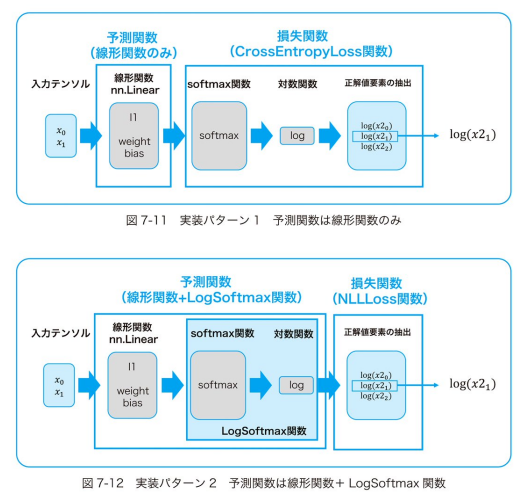  

PyTorchでは実装パターン1が採用されることが多い

- パターン1の実装の原則は以下になる  
  - 予測関数側では，活性化関数は不要で，**線形関数の出力をそのまま出力とする**
  - 予測関数出力から**確率値を得たい場合は，予測関数出力にsoftmax関数をかける**
  - **損失関数はCrossEntropyLoss関数**
  - CrossEntropyLoss関数はその最終段がnn.NLLLoss関数なので．**第2引数として引き渡す正解値はNLLLoss関数同様に整数値にする必要**がある




---

# データ準備
- データ読み込み

In [ ]:
# 学習用データ準備

# ライブラリのインポート
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

# 結果確認
print('元データ', x_org.shape, y_org.shape)

<br>  

- データ絞り込み
  - 学習データx_orgは，1列目と3列目に絞り込んで，x_selectに代入している

In [ ]:
# データ絞り込み
# 入力データはsepal（がく片）length(0)とpetal（花弁）length(2)のみ抽出
x_select = x_org[:,[0,2]]

print("元データ", x_select.shape, y_org.shape)

<br>  

- 訓練データと検証データの分割
  - 今回は，分割の比率を75件対75件としている
    - パラメータは比率でも表せるため，今回の場合0.5対0.5で指定しても同じである

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

<br>  
- 散布図の表示

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

# データを正解値ごとに分割
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

# 散布図の表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()



---

# モデル定義
- 入力次元数と出力次元数の確認

In [ ]:
# 学習用パラメータ設定

# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
# 分類先クラス数　今回は3
n_output = len(list(set(y_train)))

print(f"n_input: {n_input} n_output: {n_output}")

<br>  

- モデル定義
  - forward関数で，**活性化関数の部分がなくなっており，単純に線形関数の結果を返している**．これは，先ほど説明した通り，損失関数側で活性化関数をカバーしているためである

In [ ]:
import torch
import torch.nn as nn

# モデルの定義
# 2入力3出力のロジスティック回帰モデル

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
                
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
# インスタンスの生成
net = Net(n_input, n_output)  

<br>  

- モデル内のパラメータ確認

In [ ]:
# モデル内のパラメータの確認
# l1.weightが行列，l1.biasがベクトルになっている

for parameter in net.named_parameters():
  print(parameter)

<br>  

- 最適化アルゴリズムと損失関数の定義
  - 損失関数にnn.CrossEntropyLossクラスを利用
   - この関数では**「softmax関数」「対数関数」「正解値要素の抽出」の3つをまとめて行っている**ことに注意

In [ ]:
import torch.optim as optim

# 損失関数：交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)



---

# 勾配降下法
以下に機械学習プログラムの全体像を示す  

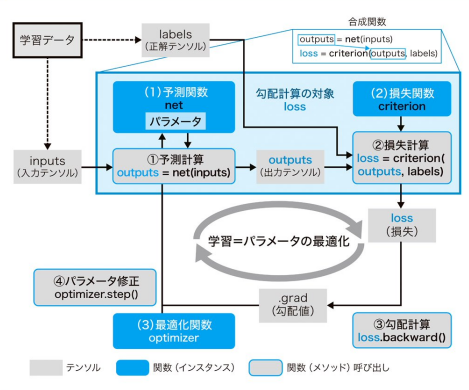

- データのテンソル化
  - 重要な変更点としてy_trainとy_testに**float関数の代わりにlong関数を呼び出している**
  - これは，後の学習でloss = criterion(outputs, labels)のように損失関数の第2引数として指定する際に，整数である必要があるためである

In [ ]:
# 入力データx_trainと正解データy_trainのテンソル変数化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

# 検証データのテンソル変数化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

<br>  

- 損失の計算グラフ化  
 - 計算グラフの区分けを下記に示す  

 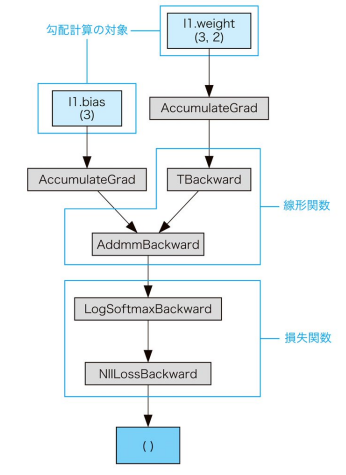

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
from torchviz import make_dot

# 予測計算
outputs = net(inputs)

# 損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

<br>  

- 予測値ラベルの取得方法  
  - 本来は，**softmax関数の出力値のうち，一番大きい（1に一番近い）値を出力した分類器を予測値とする**のが正しいラベルの計算方法
  - しかし，今回はこれをsoftmax関数にかける前の状態のベクトルで行っている．
  - これは，**softmax関数は入力の段階で最大であった項目が出力後も最大になる性質を持っている**ためである
  - よって，softmax関数の前の状態で最大の値を持つ項目を見つければ，それが予測値ラベルとなる

In [ ]:
# torch.max関数を呼び出し
# 2つ目の引数は軸を意味する．1だと行ごとの集計
print(torch.max(outputs, 1))

上記コードのtorch.max関数では，最大値そのもの（values）と最大値を取ったインデックス（indices）の2つを同時に返すしようとなっている．  

**ラベル値を取得したい場合は，2つ目のindicesを取ってくればよい**ので下記コードのようになる  

※ torch.maxの後ろに[1]をつけるとインデックスのみを抽出可能（2章参照）

In [ ]:
# 予測データのリストを取得
torch.max(outputs, 1)[1]

<br>  

- 繰り返し処理

In [ ]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 予測ラベル算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))



---

# 結果確認
- 損失，精度確認

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

<br>  

- 学習曲線（損失）

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

<br>  

- 学習曲線（精度）
  - 訓練データより検証データの精度の方がよくなっているが，データの分割方法によってはこのようなことも起こりえる  
    - 例えば，データ件数が少ない場合，外れ値がどちらに入るかで精度が大きく変わる

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>  

- モデル出力の確認
  - 今回は，softmax関数が損失関数側に含まれてしまっているため，モデルの出力がどんな数値になっているか，そこから確率値を取得したい場合どうしたらいいかを確認する

<br>  

- 正解データの先頭の方から，値が0,1,2のものを1つずつ抜き出す

In [ ]:
print(labels[[0,2,3]])

<br>  

- 同様のインデックスでinputsのデータを抽出

In [ ]:
i3 = inputs[[0,2,3],:]
print(i3.data.numpy())

<br>  

- 絞り込んだi3を引数にnet関数を呼び出し
- その結果をo3に格納
- また，o3をsoftmax関数にかけた結果をk3に格納
- **上記の手順でnet関数の出力の確率値を取得可能**

In [ ]:
softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print(o3.data.numpy())
print(k3.data.numpy())

<br>  

- 重み行列とバイアスの値

In [ ]:
print(net.l1.weight.data)
print(net.l1.bias.data)



---

# 入力変数の4次元化
入力項目を2項目から4項目に増やした結果を確認する．  

変更点はデータ分割の出発点をxのデータのx_selectからx_orgにするのみで，残りは同じ

In [ ]:
# 訓練データ、検証データに分割 (シャフルも同時に実施)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_org, y_org, train_size=75, test_size=75, 
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 入力次元数
n_input = x_train.shape[1]

In [ ]:
print('入力データ(x)')
print(x_train[:5,:])
print(f'入力次元数: {n_input}')

In [ ]:
# 入力データ x_train と正解データ y_train のテンソル変数化
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

# 検証用データのテンソル変数化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [ ]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

In [ ]:
for epoch in range(num_epochs):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    #予測値算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

In [ ]:
# 損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()



---

# コラム
略

# 8章　MNISTを使った数字認識

# 問題の定義
今回は「MNIST 手書きデータセット」と呼ばれる学習データを利用する．  

手書き数字の画像データがどのような形式で表現されているかを下図に示す  

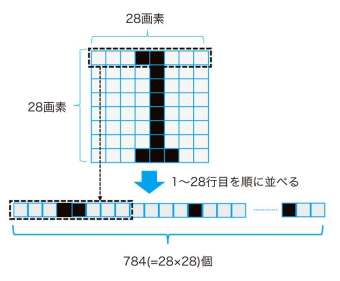  

特徴を示すと
- 画像データは縦，横それぞれ28画素
- 画素ごとの色の濃淡は0から255
  - ただし，PyTorchのライブラリ経由で取得する場合，[0,1]の範囲の浮動小数点表現になっている
- PyTorchで取得する場合，このデータは[1,28,28]の3階のテンソルになる
- 上記の形式の画像データはCNNならばそのままの状態で機械学習モデルに入力可能
- しかし，本章で使用する「全結合型ニューラルネットワーク」の場合，入力は1階テンソル（ベクトル）形式になっていることが前提
  - そこで，本章では上図下側のように，784(28×28)要素の1次元配列に変換したものを入力とする
- 数字は10種類あるため，分類先のクラス数は10個

<br>  
本章のモデルは多値分類であるが下図のように，線形関数が2段階になっている．これは，いわゆる「隠れ層あり」のモデルであることを意味する  
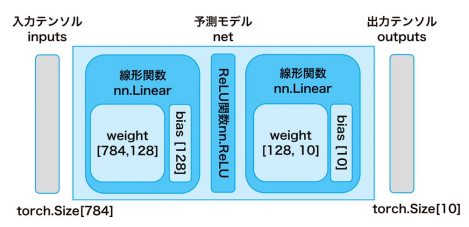
<br>  
以上をまとめると今回作成するモデルは**「入力784次元，出力10次元，隠れそうありのニューラルネットワーク」**ということになる



---

# 本章で扱う重要概念
本章では，はじめて**隠れ層**を含んだモデルを構築する  

また，活性関数には始めて登場する**ReLU関数**も扱う  

本章では，これまでの演習と比較して，膨大な計算量が必要なため**GPU**の存在が重要となる．  

機械学習の入力データには，事前になんらかの加工が必要な場合があり，このような処理は**データ前処理**と呼ぶ  

本章では，学習データの件数がこれまでよりも多く，6万件もあるため，どのような単位で1回の学習を行うかが重要となる．そこで，**ミニバッチ学習法**を用いることとなる．



---


# ニューラルネットワークとディープラーニング
ディープラーニングは下図のように，線形関数が2階層以上のモデルのことを言う．  

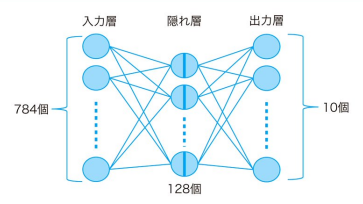



---

# 活性化関数とReLU関数
最初に，階層の深いニューラルネットワークについては「**単なる線形関数の結果を次の隠れ層の入力にするだけでは，いくら層を深くしても1階層のモデルと数学的に変わらない**」ことが分かっている．  

よって，階層の深いニューラルネットワークでは「**非線形関数**」と呼ばれる関数を作用させる必要がある．  

この関数は，機械学習の世界では活性化関数と呼ばれ，本章では**ReLU関数**を利用する．  

- ReLU関数のグラフ
  - ReLU関数では，x<0の時には0，x=>0では，y=xの1次関数を出力する．
  - 非常にシンプルであるが，x=0で別の関数に切り替わるため，結果的に「**非線形関数**」の1つとなり**ディープラーニング用の活性化関数として意味を持つ**ことになる

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display
import torch
import torch.nn as nn
# warning表示off
import warnings
warnings.simplefilter('ignore')
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

# ReLU関数のグラフ
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()



---

# GPUの利用
PyTorchでは，プログラムで自動的にGPUが**利用されない**ので，注意する必要がある．  
※ Kerasでは，GPU利用の可否をシステム（フレームワーク）が自動で調べて，利用可能であれば，自動的にGPUが利用される  
<br>  
- GPUの存在のチェック

In [ ]:
# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

<br>  

- GPU利用のルール
  - PyTorchでGPUを利用する場合のルールは以下
    - テンソル変数はデータがCPU/GPU上のどちらにあるのかを属性として持っている
    - CPUとGPU間でデータはto関数で転送
    - 2つの変数の両方ともがGPU上にある場合，演算はGPUで行われる
    - 変数の片方がCPU,もう片方がGPUの場合，演算はエラーとなる
  - 以下のコードではCPUで演算されていることになる

In [ ]:
# テスト用テンソル変数x,y
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# xとyの間の演算
z = x*y
print(z)

<br>  

- xのみをGPUに送る
  - テンソル変数ではデータ転送の目的でto関数を利用可能
    - これはCPU->GPU, GPU->CPUに転送が可能
  - また，テンソル変数はdevice属性も持っており，これによりGPU/CPUのどちらに属しているかが確認可能
  - 以下コードはxのみをGPUに送り，属性を調べたもの

In [ ]:
# 変数xをGPUへ
x = x.to(device)

# 変数xとyのdevice属性の確認
print("x: ", x.device)
print("y: ", y.device)

<br>  

- GPUの変数間の演算
  - yをGPUに送らずに演算を `z = x*y` のように行うと，エラーが起こるためyもGPUに送ってから演算を行う

In [ ]:
# yもGPUへ
y = y.to(device)

z = x*y
print(z)

<br>  

- モデルのインスタンス（net）をGPUに送る
  - モデルのインスタンスについても，GPUに所属しているかどうかを意識する必要がある
  - 理由は，**モデルの内部には線形関数などのインスタンスが含まれており，そこにはインスタンス変数があるため**

  ```
  net = Net(n_input, n_output, n_hidden).to(device)
  ```



---

# データ前処理
学習データをモデルに入力する前に加工を行う．これをデータ前処理という  

データ前処理の例として以下がある  
- 値の範囲の変更：[0,1]の範囲を[-1,1]の範囲へ変更
- 次元の変更：1件のデータが[1,28,28]の3階テンソルを[784]の1階テンソルへ  

PyTorchでは，torchvision.transformsというライブラリに前処理に便利な関数がそろっており，これを用いることでデータの変換が可能  

さらに，Datasetという学習データを取得するためのクラスと組み合わせることで，「学習データをどこから取得するか」という話と「取得したデータにどのような前処理をするか」という話を全く独立して扱うことが可能  



---

# ミニバッチ学習法
今回は，データ件数が6万件もあるため，全件分でまとめて勾配計算するのは1回の処理に時間がかかりすぎるため，効率が悪くなる．  

そこで，グループ単位で勾配を計算する方法が考えられた．また，グループのメンバーを選ぶ際に乱数を使うので，繰り返し処理ごとに別のグループができるので勾配降下法における局所最適解に陥ることを避けられる．

全件でまとめて勾配計算する方法は「バッチ学習法」とよばれるのに対して，グループに分ける方法は「ミニバッチ学習法」と呼ばれる  

PyTorchでは**簡単にこのミニバッチ学習法が使えるデータローダーという仕組みが用意**されている



---

# データ準備1（データセットによる読み込み）
PyTorchでは，データ準備のための道具が豊富であり，  

- データ入手：Dataset（データセット）
- データ加工：Transforms
- ミニバッチ用データセット生成：DataLoader（データローダー）
などの，それぞれ専用のクラスが用意されている．  
<br>       
  
- データ取得  
  - データセットクラスのインスタンスの1つであるdatasets.MNISTを利用して，train_set0という変数に読み込んでいる
  - データセットクラスを使って読み込んだデータは，Pythonで手軽に扱える

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
# ライブラリのインポート
import torchvision.datasets as datasets

# ダウンロード先ディレクトリ名
data_root = "./data"

train_set0 = datasets.MNIST(
    # 元データダウンロード先の指定
    root = data_root,
    # 訓練データか検証データか
    train = True,
    # 元データがない場合に，ダウンロードするかどうか
    download = True
)

In [ ]:
# ダウンロードしたファイルの確認
! ls -lR ./data/MNIST

<br>  

- データセットの確認
  - 読み込んだデータセットであるtrain_set0はPythonのリストとして（入力データ，正解データ）のセットを順に取得可能
  - データセットの最初の要素を入力データimageと正解データlabelに代入し，それぞれの型をtype関数で確認

In [ ]:
print("データ件数: ", len(train_set0))

# 最初の要素の取得
image, label = train_set0[0]

print("入力データの型：", type(image))
print("正解データの型：", type(label))

<br>  

- 最初の要素の確認

In [ ]:
plt.figure(figsize=(2,3))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

<br>  

- 複数のイメージを正解データ付きで表示
  - ライブラとして用意されているdatasets.MNISTクラスのインスタンス変数であるtrain_set0がオリジナルのデータファイルを隠蔽して，Pythonから扱いやすいリスト型のインターフェイスを提供している

In [ ]:
# 正解データ付きで、最初の20個をイメージ表示

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # image と labelの取得
    image, label = train_set0[i]
    
    # イメージ表示
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



---

# データ準備2（Transformsによるデータ前処理）
- Step1 Totensorの利用
  - transdorm1というインスタンスを定義し，その中でToTensorクラスを呼び出し
  - transform1をtrain_setのtransformオプションとして指定

In [ ]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # データのテンソル化
    transforms.ToTensor()
])

train_set1 = datasets.MNIST(
    root = data_root, train=True, download=True,
    transform = transform1
)

<br>  

- transform1の変換結果の確認
  - image変数がテンソル変数に変換されている
  - shapeが[1,28,28]で，最小値が0，最大値が1の形になっていることが確認できる

In [ ]:
image, label = train_set1[0]
print("入力データの数：", type(image))
print("入力データのshape", image.shape)
print("最小値：", image.data.min())
print("最大値：", image.data.max())

<br>  

- Step2 Normalizeによる正規化
  - Normalizeクラスを利用してデータを「正規化」する
  - 今回はすでに[0,1]に正規化されているが，[-1,1]に変更する
  - $Normalize(\mu, \sigma)$により，元のデータ$x$は$X=(x-\mu)/\sigma$に変換される
    - $\mu=\sigma=0.5$とすると，[0,1]の範囲の値$x$を[-1,1]の範囲の値$X$に変換可能
  - **PyTorchではComposeというクラスに複数の部品をリスト形式で渡すと，それぞれの処理を行うtransformを作成可能**

In [ ]:
transform2 = transforms.Compose([
    # データのテンソル化
    transforms.ToTensor(),

    # データの正規化
    transforms.Normalize(0.5, 0.5),
])

train_set2 = datasets.MNIST(
    root = data_root, train = True, download = True,
    transform = transform2
)

<br>  

- transform2の変換結果の確認
  - 最小値，最大値の欄が[0,1]から[-1,1]に変更されている

In [ ]:
image, label = train_set2[0]
print("入力データの数：", type(image))
print("入力データのshape", image.shape)
print("最小値：", image.data.min())
print("最大値：", image.data.max())

<br>  

- Step3 Lamdaクラスを利用して1次元化
  - 入力変数のshapeを元の[1,28,28]から[784]に変更
  - Transformsで部品が提供されていない場合は，**Lambdaクラスを利用し，やりたい変換をラムダ式で書いて引数に**すれば実装可能

In [ ]:
from torchvision.transforms.transforms import Lambda
transform3 = transforms.Compose([
    # データのテンソル化
    transforms.ToTensor(),

    # データの正規化
    transforms.Normalize(0.5, 0.5),

    # テンソルの1階テンソル化
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root, train = True, 
    download = True, transform = transform3
)

<br>  

- Lambdaクラスの変換結果の確認

In [ ]:
image, label = train_set3[0]
print("shape", image.shape)
print("最小値：", image.data.min())
print("最大値：", image.data.max())

<br>  

- 最終的なTransformの定義

In [ ]:
# データ変換用関数 Transforms
# (1) Imageをテンソル化
# (2) [0, 1]の範囲の値を[-1, 1]の範囲にする
# (3) データのshapeを[1, 28, 28]から[784]に変換

transform = transforms.Compose([
    # (1) データのテンソル化
    transforms.ToTensor(),
    
    # (2) データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1階テンソルに変換
    transforms.Lambda(lambda x: x.view(-1)),
])

<br>  

- 最終的なデータセットの定義

In [ ]:
# データ取得用関数 Dataset

# 訓練用データセットの定義
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 検証データセットの定義
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

上記のような考え方を拡張すれば，データセットに独自のクラスを定義することも可能  

**オブジェクト指向の考えをうまく取り入れて，機械学習モデル構築における2大タスクである「データ準備」と「モデル構築」をきれいに切り分けることが可能**



---

# データ準備3（データローダーによるミニバッチ用データ生成）
データ準備の最終タスクとしてミニバッチ処理の準備を行う  

このタスクでは，PyTorchのデータローダー（DataLoader）というクラスを利用する

In [ ]:
from torch.utils.data import DataLoader

# ミニバッチのサイズ指定
batch_size = 500

# 訓練用データローダー
# 訓練用なので，シャッフルする
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True
)

# 検証用データ
# 検証用にシャッフルは不要
test_loader = DataLoader(
    test_set, batch_size = batch_size, 
    shuffle = False
)

<br>  

- データローダーのテスト
  - データローダーではlen関数で何組のデータが取れるか確認可能
    - 120は60000/500の結果と一致していることが分かる

In [ ]:
# 何組のデータが取得できるか
print(len(train_loader))

# データローダーから最初のセットを取得
for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)



---

# モデル定義

- 入力，出力次元数の定義
  - 今回は，隠れ層のノード数も含まれる

In [ ]:
# 入力次元数
n_input = image.shape[0]

# 出力次元数
# 分類先クラス　今回は10
n_output = len(set(list(labels.data.numpy())))

# 隠れ層のノード数
n_hidden = 128

print(f"n_input: {n_input} n_hidden: {n_hidden} n_output: {n_output}")

<br>  

- モデルクラスの定義
  - **線形関数（nn.Linear）が1つから2つに増加**
  - 活性化関数としてReLU関数もクラス内で定義
    - forward関数にて，**最初の線形関数の出力に対してReLU関数**をかけている
    - **2層目（出力層）の線形関数の出力に対して活性化関数がないのは，前章と同様に，損失関数側にsoftmax関数を含めるため**
  - **パラメータを1.0にする設定がなくなっている**．これは，モデルのパラメータが増大したことにより，1.0に統一するとうまく学習できないため
    - そのため，初期設定である「乱数を使った初期化」に変更している

In [ ]:
# モデルの定義
# 784入力　10出力　1隠れ層のニューラルネットワークモデル

class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    # 隠れ層の定義
    self.l1 = nn.Linear(n_input, n_hidden)

    # 出力層の定義
    self.l2 = nn.Linear(n_hidden, n_output)

    # ReLU関数の定義
    self.relu = nn.ReLU(inplace = True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    return x3

<br>  

- モデル変数の定義

In [ ]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデル変数の生成
net = Net(n_input, n_output, n_hidden)

# モデルをGPU側に送る
net = net.to(device)

<br>  

- 最適化アルゴリズムと損失関数

In [ ]:
# 学習率
lr = 0.01

# アルゴリズム: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

<br>  

- モデル内のパラメータの確認
  - 前章までは，変数がl1.weightとl1.biasの2つだったが，l2.weightとl2.biasが増えている
  - device='cuda:0'の表示がある

In [ ]:
# モデル内のパラメータの確認
# l1.weight, l1.bias, l2.weight, l2.biasがあることがわかる

for parameter in net.named_parameters():
  print(parameter)

<br>  

- モデルの概要表示
  - この結果からも線形関数のインスタンスが2つに増えたことと，ReLUのインスタンスがあることが分かる

In [ ]:
print(net)



---

# 勾配降下法
PyTorchの機械学習プログラムの概要は下図になる  

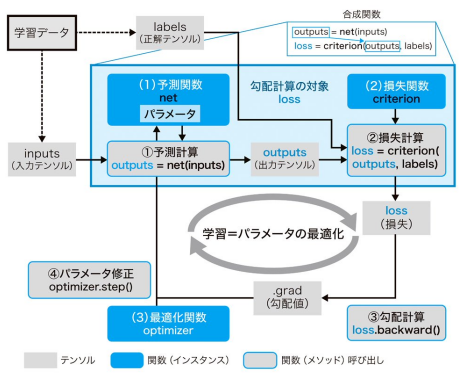

- 予測計算
  - 訓練用のデータローダーであるtrain_setから1セット分のデータを取得
  - このコードは，本来のループ処理を1回分だけ行うダミーコードとなる

In [ ]:
# 訓練データセット　最初の1項目を取得
# データローダーから最初の1セットを取得
for images, labels in train_loader:
  break

<br>  

- 学習データのGPUへの転送
  - データローダから取得した学習データは，当初CPUにあるので，GPU側へ移動する

In [ ]:
inputs = images.to(device)
labels = labels.to(device)

<br>  

- 予測値の計算
  - net関数に入力変数inputsを渡して予測値を計算

In [ ]:
outputs = net(inputs)

print(outputs)

<br>  

- 損失計算と計算グラフの可視化
  - 前章までの計算グラフでは，biasとweightがそれぞれ1つずつだったが，今回は2つずつ出てきている
  - これが，**線形関数をモデルに2つ取り入れた（隠れ層のあるモデルを作った）ことに対応**

In [ ]:
from torchviz import make_dot

# 損失計算
loss = criterion(outputs, labels)

# 損失の取得
print(loss.item())
                 
# 損失の計算グラフ可視化
make_dot(loss, params=dict(net.named_parameters()))

<br>  

- 勾配計算

In [ ]:
# 勾配計算の実行
loss.backward()

In [ ]:
# 勾配計算の結果
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

<br>  

- パラメータ修正

In [ ]:
# 勾配降下法の適用
optimizer.step()

In [ ]:
# パラメータ値の表示
print(net.l1.weight)
print(net.l1.bias)

<br>  

- 繰り返し処理

In [ ]:
import torch.optim as optim

# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history = np.zeros((0,5))

<br>  

- 変更点
  - **ミニバッチ処理でも繰り返し計算が入ることで，2重の繰り返しループになっている**
    - そのため，データローダから学習データを取り出すたびにデータをGPUに送る処理が必要になっている
  - **訓練フェーズでミニバッチ処理用にループを回す際に，tqdm関数を経由**する（以下，該当部分抜粋）  
  ```
  rom tqdm.notebook import tqdm
  for inputs, labels in tqdm(train_loader):
  ```
これにより，プログレスバーが表示されることになり，学習の進行具合が分かりやすく可視化される

In [ ]:
# tqdmライブラリのインポート
from tqdm.notebook import tqdm

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 損失と精度の計算
        train_loss += loss.item()
        train_acc += (predicted == labels).sum() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

            
        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        # 損失と精度の計算
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum()

    # 評価値の算出・記録
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))



---

# 結果の確認

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

In [ ]:
# 学習曲線の表示 (損失)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

In [ ]:
# 学習曲線の表示 (精度)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>  

- 認識精度を画像で確認

In [ ]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

In [ ]:
# 最初の50件でイメージを「正解値:予測値」と表示

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  # numpyに変換
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  # imgの範囲を[0, 1]に戻す
  image2 = (image + 1)/ 2
    
  # イメージ表示
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



---

# 隠れ層の2層化
- クラスの定義

In [ ]:
# モデルの定義
# 784入力10出力2隠れ層のニューラルネットワークモデル

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 隠れ層1の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 隠れ層2の定義 (隠れ層のノード数: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 出力層の定義
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

<br>  

- モデルの概要表示

In [ ]:
# モデルの概要表示

print(net)

<br>  

- 繰り返し計算

In [ ]:
# 乱数の固定化
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# モデルインスタンス生成
net = Net2(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 200

# 評価結果記録用
history2 = np.zeros((0,5))

In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 損失と精度の計算
        train_loss += loss.item()
        train_acc += (predicted == labels).sum() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        # 損失と精度の計算
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum()

    # 評価値の算出・記録
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

<br>  

- 結果確認

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history2[0,3]:.5f} 精度: {history2[0,4]:.5f}' )
print(f'最終状態: 損失: {history2[-1,3]:.5f} 精度: {history2[-1,4]:.5f}' )

In [ ]:
# 学習曲線の表示 (損失)
plt.plot(history2[:,0], history2[:,1], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history2[:,0], history2[:,2], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()



---

# コラム　勾配消失とReLU関数
シグモイド関数では，入力値が0から離れていると，傾き（＝勾配値）は0に近づく．  

学習は勾配値に基づいて行われるので，勾配が0に近づくと学習は極めて困難になる  

これが**「ディープラーニングの勾配消失問題」の本質**  

一方，ReLU関数では，入力値がプラスでさえあれば，xの値によらず勾配値は常に一定となる．すなわち，**勾配消失が起きにくい．**  

ディープラーニングの急速な発展の1つに「**ReLU関数の発見**」があったことは確かである



---

# コラム　ラムダ式による関数定義
ラムダ式による関数定義の前に，def文による通常の関数定義の方法を復習する．  

1章では，下記のように2次関数を定義した

In [ ]:
# 通常の関数定義
def f(x):
  return (2 * x**2 + 2)

また，関数を呼び出すときは下記のようになる

In [ ]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

<br>  
次に，ラムダ式で同様のコードを実装する

In [ ]:
# ラムダ関数による関数定義

g = lambda x: 2* x**2 + 2

このように定義した関数gもf(x)と同様に，下記コードで呼び出し可能

In [ ]:
y = g(x)
print(y)

<br>  

ここで，先ほどのlambda式を使用して，1階テンソル化を行った箇所を再度確認する  
```
transform3 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # Tensorの1階テンソル化
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform3)
```
<br>  

Lambdaクラスは**引数として関数を取るので**上記コードを普通の関数定義の方法で実現すると  
```
def f(x):
  return x.view(-1)
```
となり，
```
transforms.Lambda(f)
```
のようにして，定義した関数f(x)を，fだけ引数にする形でLambdaに渡す．  
このように，「関数定義」と「Lambdaクラスの呼び出し」の2ステップが必要になる  
<br>

一方で，
```
transforms.Lambda(lambda x: x.view(-1)),
```
のように定義すると，Lambdaクラスの呼び出し時にまとめて，関数定義までできる．  

ラムダ方式では関数に名前を付けることをしなくても済む（この使い方を**無名関数**と呼ぶ）のでよりスマートなコードを記述することが可能となる（fという関数はここでしか使わないので，fという名前を定義することすら無駄）



---


# コラム　バッチサイズと精度の関係
ミニバッチ学習法において，今回の例では「バッチサイズを小さくした方が，精度が良くなる」．  

その結果を下図に示す  
図を見ればわかるように，バッチサイズが大きく影響していることが分かる  

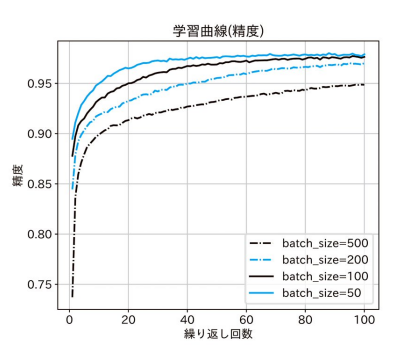



# 9章　CNNによる画像認識

本章から「本当に業務で利用できるディープラーニングのモデル」をPyTorchで実装できるようになることを目指す  

ディープラーニングの発展のきっかけとなるアルゴリズムにAlexNetがあるが，これの中心的なアイデアが後にCNN(Convolutional Neural Netwotk)と呼ばれるネットワークになる．  

本章では「CIFAR-10」と呼ばれる機械学習用のイメージ学習データを題材に，CNNによるモデル構築を試みる




---

# 問題の定義
「CIFAR-10データセット」は32×32のカラーイメージデーが，airplane, automobile, birdなど10種類のカテゴリに分けられており，イメージからカテゴリを予測する分類問題の学習データとして用いられる．  
訓練用5万枚，検証用1万枚のデータが公開されている  

MNISTの最大の違いはカラー画像である点．  
よって，元データも下図のように画像1枚当たり（3,32,32）という3階テンソルで表現される  

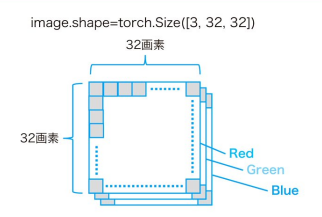  

CNNでは，「色，縦，横」の3階テンソルの構造を保ったままで画像を処理する．  

2階層目以降では「色」に該当するインデックスは色ではなくなってしまうので，奥行にあたるインデックスは一般に「**チャネル**」と呼ばれる  

本章ではCIFAR-10の問題としての難しさを確認するため，最初にあえて学習データを1階テンソル化し，前章と同じ「全結合型ニューラルネットワーク」でモデルを構築する  



---

# 本章で扱う重要概念
CNNの中で特に重要な構成要素である「**畳み込み**」と「**プーリング**」の処理について，以降で詳しく説明する



---

# CNNの処理概要
下図にAlexNetの論文に記載されたネットワーク図を示す  

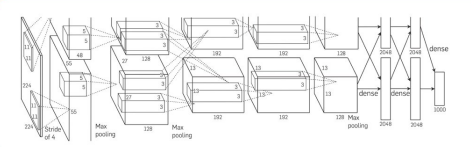  

より一般化したものとして典型的なCNNのネットワーク図を示す．  

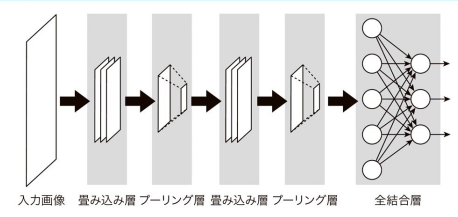  

CNNを特徴づける処理として「**畳み込み処理（Convolution）**」と「**プーリング処理（Pooling）**」がある

<br>  
- 畳み込み処理  
畳み込み処理の図を下記に示す  

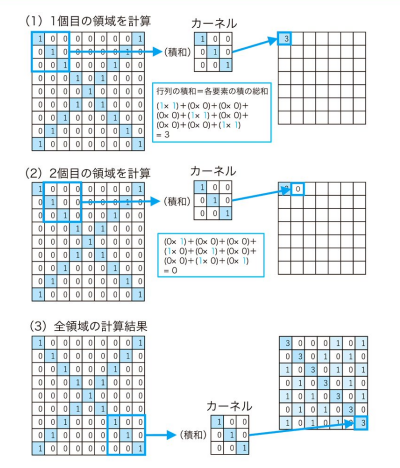  

- まず，3×3や5×5などの小さな正方形領域の配列を用意する．この配列のことを畳み込み処理では「**カーネル**」と呼ぶ
  - カーネルのサイズは一般的に奇数
- 次に，元の画像をカーネルと同じ大きさ正方領域で切り取って，カーネルと対応する要素間で積を取り，その結果を加算した結果（積和）を出力領域の出力とする
- 切り取る領域を1つずつずらして，同じように積和を取り，隣の領域の出力とする
- この処理を繰り返すことで，新しい正方形の出力パターンができあがる  
<br>   

実際の畳み込み処理はもう少し複雑である．  

入力チャンネルは複数あり，積和演算は全チャネルにまたがって行われてるため「カーネル」もそれに対応して入力チャンネル分ある．  

さらに出力チャンネルも複数あるため，**カーネルは全体で4階テンソルの構造を持つことになる**  

**この4階のテンソルのカーネル配列がニューラルネットワークの「パラメータ」に該当**し，このテンソルの値が学習対象になる  

畳み込み処理は，カーネルの内容により，特定の傾きの直線が協調されるなど図形の特徴量の抽出に向いている  
また，カーネルが移動しながら学習するため**位置の移動に無関係な特徴量を検出可能**  

下図は，同じ畳み込み処理を何回かかけた結果である．処理を重ねるごとに左下から右上の向きの直線が強調されるようなカーネルを適用している  

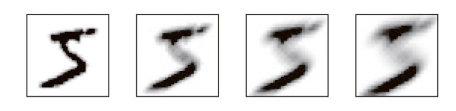


<br>  
- プーリング処理
  - プーリング処理にもっともよく使用されるMax Poolingの処理概要を下図に示す  

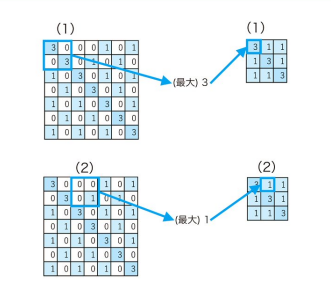  

- 2×2などの小さな矩形領域で対象画像を区切り，その範囲での最大値を出力する
- 矩形領域をずらして再度最大値を取得し，隣の領域の値とする
<br>  

畳み込み処理は，1画素ずつずらして処理することが多いのに対して，プーリング処理は重なる領域をとらないようにずらすのが普通．  

矩形領域のサイズは2×2が多いので，**縦横ともに元の画像の半分の画素数の新しい画像ができる**ことになる  

プーリング処理では，画像を縮小するのと同じような効果が期待できる．そのため，**物体の大きさによらない普遍的な特徴量を抽出するのに向いている**と言われる



---

# PyTorchでのCNN実装

- CNNの全体構造
  - 典型的なCNNの構成例を以下図に示す  
  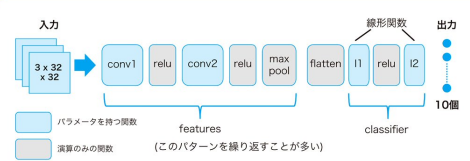  
- 畳み込み処理はPyTorchでは**nn.Conv2d**というレイヤー関数（畳み込み関数）が担う
  - 上図ではconv1, conv2として示している
- プーリング処理は**nn.MaxPool2d**というレイヤー関数（プーリング関数）が担う
  - 上図ではmaxpoolとしている
  
- 上図では，内部にパラメータを持つもの（＝学習の対象）とそうでないものを色分けしている
  - 畳み込み処理は関数の内部にパラメータを持つ
  - プーリング関数は単なる演算なので，パラメータは持たない
  - 線形関数はパラメータを持つ
  - ReLU関数はパラメータを持たない
- 「**1階化関数（flatten）**では，チャネル，縦，横と3階の広がりを持つ「畳み込み関数」「プーリング関数」の出力を横1列の1階テンソルにする操作
  - 分類モデルでは，最終的な出力が1階テンソルなので，どこかのタイミングでこの操作が必要
  - PyTorchのチュートリアルではview関数を使うことが多いが，Kerasなどの他のフレームワークとの互換性も考慮し，nn.Flattenというレイヤー関数を用いて実装する

<br>  

- nn.conv2dとnn.MaxPool2d
  - 以下コードは，CNNモデルの定義のうち「畳み込み関数」と「プーリング関数」にかかわる変数定義を抜き出したものになる  
  - 畳み込み関数はnn.Conv2dというレイヤー関数で実現される
    - 第1引数：入力チャンネル数
    - 第2引数：出力チャンネル数
    - 第3引数：フィルターとなるカーネルの1辺の画素数を意味するカーネルサイズを指定
  - プーリング関数はnn.Conv2dというレイヤー関数で実現
    - 引数の(2,2)はそれぞれ小さい矩形の縦と横の画素数を示す
  - ReLUは単なる関数でパラメータを持たず，利用時には同じ関数を用いて使いまわす前提なので，1つしか定義していない

In [ ]:
import torch
import torch.nn as nn
# CNN前半部分 レイヤー関数の定義

conv1 = nn.Conv2d(3, 32, 3)
relu = nn.ReLU(inplace=True)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2,2))

<br>  

- conv1とconv2の内部パラメータの確認
  - conv1とconv2のweightは4つのインデックスをもつ4階テンソルになっている
  - conv1の外部から見たふるまいを下図に示す 
    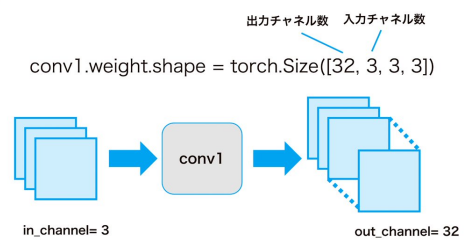
  - weightのshapeの最初の要素である「32」は出力チャンネル数に対応する
  - 2つ目の要素の「3」は入力チャネル数   
  <br>
  - conv1.weightの内部構造を下図に示す  
  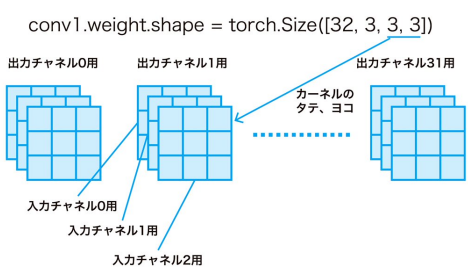
  - 上図の出力チャネル1用のカーネルは「入力チャネル0用」から「入力チャネル2用」まで3枚ある
  - 実際の畳み込み処理では積和演算を全部で「入力チャネル数」回（図の場合3回）行う
  - その結果をすべて加算したものが最終的に出力チャネル1のパターンとなる
  - 全体では，「出力チャネル0用」から「出力チャネル31用」までの全部で32セット，このようなパラメータが存在する

In [ ]:
print(conv1)

# conv1の内部変数のshapeを確認
print(conv1.weight.shape)
print(conv1.bias.shape)

# conv2の内部変数のshapeを確認
print(conv2.weight.shape)
print(conv2.bias.shape)

<br>  

- 畳み込み処理とプーリング処理のシミュレーション  
- 入力用ダミー変数の生成
  - torch.randn：引数で指定されたshapeの形状で平均0分散1の正規分布に基づく乱数を生成

In [ ]:
# ダミーで入力と同じサイズのテンソルを生成
inputs = torch.randn(100, 3, 32, 32)
print(inputs.shape)

<br>  

- CNNの前半処理のシミュレーション

In [ ]:
x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)

<br>  

- CNN途中段階のshape確認
  - torch.Size(データ件数, チャネル数, 画素数)の順番
  - 例）torch.Size(100, 3, 32, 32)
    - データ件数：100
    - チャネル数：3
    - 画素数：32, 32
  - 畳み込み関数を1回通るたびに「32→30」「30→28」と2ずつ減っている
    - これは，今回畳み込み処理で使用している重み行列（カーネル）のサイズが3×3であることと，畳み込み関数を通すと「畳み込み処理行列のサイズ-1」だけ出力データの画素数が減ることに対応
  - プーリング処理後は，縦と横のサイズが半分の「14」になっている
  - ReLU関数ではサイズに変化なし

In [ ]:
print(inputs.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

<br>  

- nn.Sequential
  - 「CNNの前半処理のシミュレーション」で示した下記のコードは複数の関数の合成関数で構成されていて，各関数が一直線につながる形になっている
  ```
  x1 = conv1(inputs)
  x2 = relu(x1)
  x3 = conv2(x2)
  x4 = relu(x3)
  x5 = maxpool(x4)
  ```   
  まったく同じ実装をnn.Sequentialを使って実現可能

In [ ]:
# 関数定義
features = nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

<br>  

- nn.Sequentialを使った実装の動作確認
  - 「CNNの前半処理のシミュレーション」と同様の結果であることが確認できる

In [ ]:
# 動作テスト
outputs = features(inputs)

print(outputs.shape)

<br>  

- nn.Flatten
  - 「畳み込み処理」「プーリング処理」の最中は3階テンソルで扱われていたデータを，線形関数（nn.Linear）で扱えるように，1階のテンソルの形に変換
  - 入力時には[100,32,14,14]だったshapeが[100,6272]の1階テンソルに変換されていることが分かる
    - 32×14×14=6272
  

In [ ]:
# 関数定義
flatten = nn.Flatten()

# 動作テスト
outputs2 = flatten(outputs)

print(outputs.shape)
print(outputs2.shape)

flatten関数で1階化された後の処理は，前章で説明した「ニューラルネットワーク」と全く同じ



---

# 共通関数の利用
実行内容が複雑になるにつれて，コードが長くなってくるがよく見ると同じようなパターンの処理が何回も出てきていることが分かる．  

そこで，このようなパターンを5つ抽出し，それぞれを共通関数として定義する

- eval_loss(損失関数)
  - 最初にデータローダーを使って，入力データと正解データを取得
  - 入力データとモデルインスタンスから予測値を計算
  - 予測値と正解データを使って損失を計算


In [ ]:
# 損失計算用
def eval_loss(loader, device, net, criterion):

  # データローダーから最初の1セットを取得
  for images, labels in loader:
    break
  
  # デバイスの割り当て
  inputs = images.to(device)
  labels = labels.to(device)

  # 予測計算
  outputs = net(inputs)

  # 損失計算
  loss = criterion(outputs, labels)

  return loss

<br>  

- fit(学習)
  - この関数ではKerasでモデルを使った場合にできるfit関数のように「**学習**」という処理を行う
  - 今まで「繰り返し計算」と呼んでいた箇所を関数呼び出しで行う
  - 引数
    - net：学習対象のモデルインスタンス
    - optimizer：最適化関数のインスタンス
    - num_epochs：繰り返し数
    - train_loader：訓練用のデータローダー
    - test_loader：検証用のデータローダー
    - device：GPU or CPU
    - history：これまでのhistory
  - 戻り値
    - history：7章までのhistoryと同様に（繰り返し回数，訓練損失，訓練精度，検証損失，損失精度）の2次元配列をNumPy形式で返す  
  <br>  
  - 前章までと比較した追加部分
    - 引数もhistoryとして指定している
      - ディープラーニングではnum_epochsの設定が難しい．少ないと，学習不足になる可能性があり，多すぎると過学習が発生する可能性がある．
      - そこで，fit関数では引数historyに今までのhistoryを渡す．すると，「追加学習」の扱いで過去分も追加したhistoryを生成してくれる（以下，該当部分）  

      ```
      def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

          base_epochs = len(history)
        
          for epoch in range(base_epochs, num_epochs+base_epochs):
              train_loss = 0
              train_acc = 0
    ```  

    - net.train(), net.eval()
      - それぞれ，訓練フェーズ，予測フェーズの先頭で呼び出し
      - この2つの関数はモデルクラスを定義する際に利用している親クラスnn.Moduleで定義されている
      - 今回は，あってもなくてもいいが，次章で登場するドロップアウト関数（nn.Dropout）やBN関数（nn.BatchNorm2d）というレイヤー関数では，それぞれの関数に対して「今は訓練フェーズ」「今は予測フレーズ」という違いを教える必要がでてくるので，その際に意味が出てくる．


In [ ]:
import numpy as np
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdmライブラリのインポート
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        #訓練フェーズ-----------------------------------------------------
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            train_acc += (predicted == labels).sum()

            # 損失と精度の計算
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        #予測フェーズ ----------------------------------------------------
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            val_acc += (predicted == labels).sum()

            # 損失と精度の計算
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

<br>  

- evaluate_history(学習ログ)
  - 学習結果の評価に関して
    - historyの先頭と最後をprint関数で表示して学習結果の概要を表示
    - 学習曲線を損失，精度の2つで表示  

    というパターンを一つの関数にまとめた

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
# 学習ログ解析

def evaluate_history(history):
    #損失と精度の確認
    print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}') 
    print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 学習曲線の表示 (損失)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='訓練')
    plt.plot(history[:,0], history[:,3], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('損失')
    plt.title('学習曲線(損失)')
    plt.legend()
    plt.show()

    # 学習曲線の表示 (精度)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='訓練')
    plt.plot(history[:,0], history[:,4], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('精度')
    plt.title('学習曲線(精度)')
    plt.legend()
    plt.show()

<br>  

- show_images_labels(予測結果表示)
  - 事前学習済みモデルで正しい予測ができているかを，元データのイメージ表示とともに行う
  - また，モデルを作る前に，イメージと正解データ（ラベル）だけを表示することも可能
  - 対象は，データローダーで取得される先頭50件（ローダーで定義される件数が50件以下の場合はその件数）
  - 引数
    - loader：検証用データローダー
    - classes：正解データに対応するラベル値のリスト．本章の場合，正解データに対応するラベル値である「plane」「car」「bird」などを含んだリスト
    - net：予測対象の事前学習済みモデルインスタンス． Noneを渡すと正解データのみを表示でき，学習前にデータの様子を確認したい時に使用
    - device：予測計算に利用するデバイス．予測結果も表示するときにのみ利用
  - 以下が，条件によりタイトル表示を可変にする本質的な部分  
  ```
  if net is not None:
  predicted_name = classes[predicted[i]]
  # 正解かどうかで色分けをする
  if label_name == predicted_name:
    c = 'k'
  else:
    c = 'b'
  ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
# netがNoneの場合は、正解ラベルのみ表示
else:
  ax.set_title(label_name, fontsize=20)
  ```  
  - 「正解値：予測値」の形式でテキストを表示するが，予測値が正解値と異なっている場合だけ，タイトルの色が青になるようにしてある．  
  - netがNoneの場合は，正解値のみをタイトルに表示する  
  - また，前章と異なりイメージの画像データが「3,32,32]の3階テンソル形式になっている．このため，実際にイメージを表示するための手順がやや煩雑となる

In [ ]:
# イメージとラベル表示
def show_images_labels(loader, classes, net, device):

    # データローダーから最初の1セットを取得する
    for images, labels in loader:
        break
    # 表示数は50個とバッチサイズのうち小さい方
    n_size = min(len(images), 50)

    if net is not None:
      # デバイスの割り当て
      inputs = images.to(device)
      labels = labels.to(device)

      # 予測計算
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 最初のn_size個の表示
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # netがNoneでない場合は、予測結果もタイトルに表示する
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 正解かどうかで色分けをする
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # netがNoneの場合は、正解ラベルのみ表示
        else:
          ax.set_title(label_name, fontsize=20)
        # TensorをNumPyに変換
        image_np = images[i].numpy().copy()
        # 軸の順番変更 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 値の範囲を[-1, 1] -> [0, 1]に戻す
        img = (img + 1)/2
        # 結果表示
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()

<br>  

- torch_seed(乱数初期化)
  - 乱数を初期化して，いつも同じ結果になるための処理
  - GPUを使って計算した場合，乱数の種を固定しただけでは結果が同一にならないことがあるので，その現象が起きないように2行追加した

In [ ]:
# PyTorch乱数固定用

def torch_seed(seed=123):
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.use_deterministic_algorithms = True



---


# データ準備

- Transforms定義
  - その後で，2通りのモデルを作ることを想定して1階テンソル版，3階テンソル版の2バージョンを用意することにする
    - transform1：全結合型ニューラルネットワーク用
    - transform2：CNN用

In [ ]:
import torchvision.transforms as transforms

# Transformsの定義

# transform1 1階テンソル
transform1  = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
  transforms.Lambda(lambda x: x.view(-1)),                                
])

# transform2 正規化のみ実施

# 検証用データ：正規化のみ実施
transform2 = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
])

<br>  

- データセット定義
  - データセットについても2通り用意する

In [ ]:
import torchvision.datasets as datasets

# データ取得用関数　データセット

data_root = "./data"

# 訓練用データセット　1階テンソル版
train_set1 = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform1
)

# 検証データセット 1階テンソル版
test_set1 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform1)

# 訓練データセット 3階テンソル版
train_set2 = datasets.CIFAR10(
    root =  data_root, train = True, 
    download = True, transform = transform2)

# 検証データセット 3階テンソル版
test_set2 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform2)

<br>  

- データセットの確認

In [ ]:
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

<br>  

- データローダー定義
  - 同様に2パターン用意

In [ ]:
from torch.utils.data import DataLoader
# データローダーの定義

# ミニバッチサイズ指定
batch_size = 100

# 訓練用データローダー
# 訓練用なので，シャッフルをかける
train_loader1 =  DataLoader(train_set1, batch_size=batch_size, shuffle=True)

# 検証用データローダー
# 検証時にはシャッフル不要
test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

# 訓練用データローダー
# 訓練用なので，シャッフルをかける
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

# 検証用データローダー
# 検証時にはシャッフル不要
test_loader2 = DataLoader(test_set2, batch_size, shuffle=False)

<br>  

- データローダーの確認

In [ ]:
# train_loader1から1セット取得
for images1, labels1 in train_loader1:
  break

# train_loader2から1セット取得
for images2, labels2 in train_loader2:
  break

print(images1.shape)
print(images2.shape)

<br>  

- 検証データのイメージ表示
  - 検証用データをtest_loader2から読み取り，先頭50個のイメージを表示
  - 共通関数show_images_labelsの機能のうち，モデルなしで正解値のみタイトルに表示するパターン

In [ ]:
# 正解ラベル定義
classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")

# 検証データ最初の50個の表示
show_images_labels(test_loader2, classes, None, None)



---

# モデル定義（全結合版）
- 各ノードの次元数設定
  - 次元数が変更されたので，入力データ次元数のn_inputが3072となっている

In [ ]:
# 入力次元数 今回は3*32*32=3072
n_input = image1.view(-1).shape[0]

# 出力次元数
# 分類先クラス数　今回は10になる
n_output = len(set(list(labels1.data.numpy())))

# 隠れ層のノード数
n_hidden = 128

# 結果確認
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

<br>  

- モデル定義

In [ ]:
# モデルの定義
# 3072入力10出力1隠れ層のニューラルネットワークモデル

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 隠れ層の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 出力層の定義
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3



---

# 結果（全結合版）
共通関数fitの導入で，学習の実装コードが1行で済むようになった

In [ ]:
# デバイスの割り当て

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
import torch.optim as optim

# 乱数初期化
torch_seed()

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数：交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50

# 評価結果記録用
history = np.zeros((0, 5))

# 学習
history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

<br>  

- 評価
  - evaluate_history関数で評価
    - 検証データに対するグラフから繰り返し回数30回程度で上限になっている
    - 検証データ精度は53％程度

In [ ]:
# 評価
evaluate_history(history)



---

# モデル定義（CNN版）
- forward関数の構造
  - forward関数は，features, flatten, classifierの3つの呼び出しを組み合わせた形になっている
  - features：畳み込み関数（nn.Conv2d）とプーリング関数（nn.MaxPool2d）から構成
  - classier：線形関数（nn.Linear）から構成される分類器
  - flatten：2つの要素の橋渡し役
  - イメージを下図に示す（再掲）  
  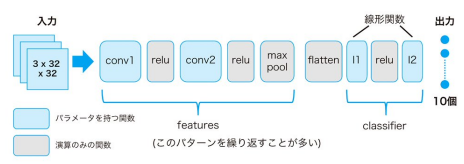  
  - ` self.l1 = nn.Linear(6272, n_hidden)`の6272はflatten関数にかけた結果である[100,6272]の数字を使っている．

In [ ]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 32, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(6272, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool)
    
    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3     

<br>  

- モデルの概要表示
  - このモデルでは，featuresとclassifierという2つのSequentialオブジェクトがある．
  - このオブジェクト内の構成要素は，例えばfeatures[0](=Conv2d)のようにリスト形式で参照可能

In [ ]:
# モデルインスタンス生成
net = CNN(n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
print(net)

<br>  

- モデルのサマリー表示


In [ ]:
!pip install torchinfo | tail -n 1

In [ ]:
from torchinfo import summary

# モデルのサマリー表示

summary(net,(100,3,32,32),depth=1)

<br>  

- 損失の計算グラフ表示
  - 区分けした図を下記に示す  
  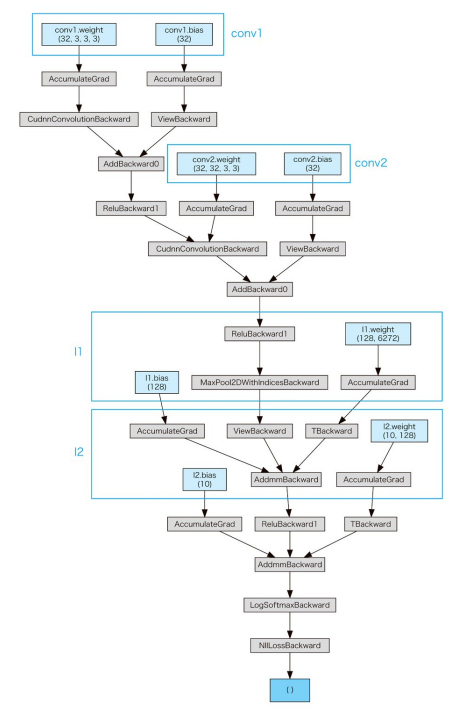

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
from torchviz import make_dot
# 損失計算
loss = eval_loss(test_loader2, device, net, criterion)

# 損失の計算グラフ可視化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)



---

# 結果
- 変更点
  - モデルインスタンス生成元クラスがNetからCNNに変わった
  - モデルインスタンス生成時のパラメータからn_inputがなくなっている
  - 全結合版では，先頭の線形関数の重み行列は入力データの件数に合わせてあらかじめ用意しておく必要があり，それがパラメータになっていたが，CNNでは固定長のカーネル行列を用意しておくだけなので，どんな大きさ入力も受け入れられる
  - 一方で，後半の全結合層（classifier）の最初の線形関数（l1）の入力次元数（今回の場合6772）は事前に計算しておく必要がある

In [ ]:
# 乱数初期化
torch_seed()

# モデルインスタンス生成
net = CNN(n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50

# 評価結果記録用
history2 = np.zeros((0,5))

# 学習
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

<br>  

- 評価
  - 精度が66％程度まで出ていることが分かる
    - 全結合の時は53％程度だったので，精度が向上していることが分かる 

In [ ]:
evaluate_history(history2)

<br>  

- show_images_labelsで予測結果付きで表示

In [ ]:
show_images_labels(test_loader2, classes, net, device)

# 10章　チューニング技法

# 本章で取り上げる重要概念
画像を対象とした分類型ディープラーニングモデルのチューニングの手法は大きく  
- ニューラルネットワークの多層化
- 最適化の改善
- 過学習対策
の3つに分類可能



---

# ニューラルネットワークの多層化
ニューラルネットワークでは一般に，より階層が深くなれば精度が良くなる．しかし，8章で勾配消失問題が起きやすくなるなどの技術的な課題も多くなるが，新しいアルゴリズムの考案などで，問題を解決しつつ，多層化を果たしていく．  

例えば，ResNetと呼ばれるモデルでは152層のネットワークが作られている．  

本章でチューニングを施すCNNの構造を下図に示す  

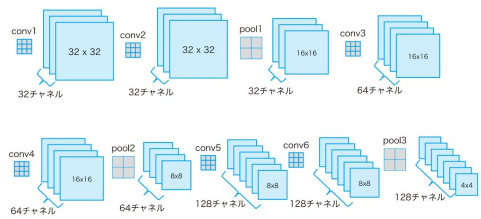  

- 畳み込み関数が6層
- プーリング関数が3層  
のモデルとなっている  

特徴として，プーリングにより中間テンソルの次元数が半分になるたび，チャネルの数を2倍に増やすようにしている




---

# 最適化関数
最適化関数とは，損失の勾配値（偏微分の計算結果）を基に，どのようなアルゴリズムでパラメータを修正するかという方式を指している．  

最適化関数の指定次第で，学習の速さが異なるのはもちろんだが，最終的な精度も異なる場合があり，ディープラーニングに欠かせない要素となる．  

- SGD(Stochastic Gradient Descent)
  - 勾配に一定の学習率をかけてパラメータ修正していくという，基本的な勾配降下法に基づく方式．  
  以下が3章でも示した，クラスを使わずに実装する場合の更新式である  
  ```
  # 学習率の定義
  lr = 0.001
  ```
  ```
  # 勾配を基にパラメータの更新
  w -= lr * W.grad
  B -= lr * B.grad
  ```  

- Momentum
  - SGDを改善したアルゴリズムとしてMomentumがある．  
  SGDが直近の勾配値しかパラメータ更新に利用しないのに対して，Momentumは過去の勾配も記憶して，その分のパラメータを一定比率で減らしつつパラメータ更新に利用する．  
  PyTorchでMomentumを利用するには，次のコードのように，クラスとしてはoptim.SGDを利用しつつ，momentumのパラメータ値だけ指定する．  
  ```
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
  ```  

- Adam
  - 最適化関数は様々あるが，Adamがある．  
  かなり複雑なアルゴリズムなので数式は省略するが，Momentumをはじめとした多数のアルゴリズムのいいところをすべて取り入れて実装したようなイメージ  
  Pytorchでは次のコードにより利用可能  
  ```
  optimizer = optim.Adam(net.parameters())
  ```



---

# 過学習とその対応
下図のように，**過学習を起こすと訓練データにばかり最適化してしまい，検証データに対する精度が上がらない，あるいはかえって悪くなるような現象**が起こる  
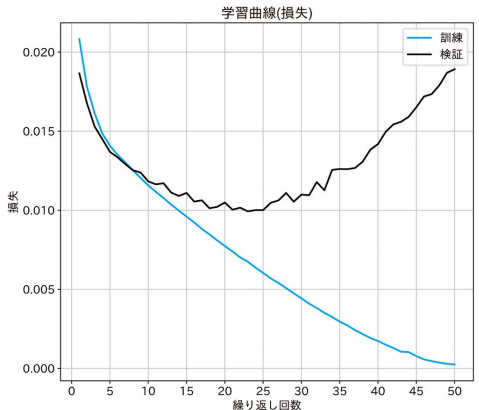  

機械学習の真の目的は，**学習に使っていない検証データに対する精度をよくすること**なので過学習は最も避けるべき弊害となる．  

過学習を避ける代表的な方法として，ドロップアウト，Batch Normalization, Data Augumentationの3つがあるのでそれぞれ説明する  

- ドロップアウト
  - 以下がドロップアウトを用いた学習の概念図になる  
  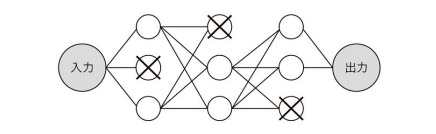  
  
  - ドロップアウトを用いた学習は以下の手順で進められる
    - ニューラルネットワークを定義する際に，2つのレイヤー関数の間にドロップアウト関数を部品として追加する．  
    ドロップアウト関数のインスタンス生成時，「ドロップアウト比率」をパラメータとして設定
    - 学習のたびに，設定したドロップアウトの比率の分だけ，ドロップアウト関数の入力となる中間テンソルからランダムにドロップアウトの対象を選び，その要素を出力しなくなる
    - 次の学習時には，新しい乱数による別のテンソル要素がドロップアウトの対象として選ばれる
    - 学習が完了して，予測フェーズになったときは，ドロップアウトの状態をなくしてすべてのテンソル要素が参加した形で予測する  

  - 学習の回ごとに学習に参加する入力要素を入れ替えることで，まんべんなく重み情報が行き渡り，結果的に過学習対策になっていると考えられている  


- PyTorchでは，ドロップアウト用のレイヤー関数nn.Dropoutが用意されており，対象のレイヤー関数間に配置することで，ドロップアウト学習ができる

<br>  

- 検証用のダミーデータ作成

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)

<br>  

- ドロップアウト関数の動作テスト
  - ドロップアウト関数の引数0.5はドロップアウト比率を示す
  - 10個の内，おおよそ5個の要素が0になっていることが分かる
    - パラメータ0.5は「どの程度の確率でドロップアウトするか」を意味するため，正確に5個がドロップアウトされるわけではない．
  - 0でない要素では，入力値と異なる値が出力されている．
    - この挙動は，オンラインドキュメントによると「ドロップアウト比率をpとしたとき，出力は1/1(1-p)倍した値が戻される」となっている
      - 入力値全体の平均がドロップアウト前と変わらないようにするための工夫と考えられる
  - 最後にeval関数を呼び出して，予測フェーズに変更している．この時の出力は入力と全く同じ

In [ ]:
# ドロップアウト関数の定義
dropout = nn.Dropout(0.5)

# 訓練フェーズの挙動
dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

# 予測フェーズの挙動
dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

<br>  

- Batch Normalization
  - ミニバッチ学習をしているときに，ミニバッチの単位で，前のレイヤー関数の出力に対して正規化の処理をした後，次のレイヤー関数の入力にすると，学習効率が上がるとともに過学習対策になることが発見された
  - このアルゴリズムを，Batch Normalizationと呼ぶ
  - PyTorchでは，Batch Normalizationはドロップアウトと同様にレイヤー関数として用意されており，これを他のレイヤー関数間に配置することで簡単に使える  

  イメージ図を下記に示す  

  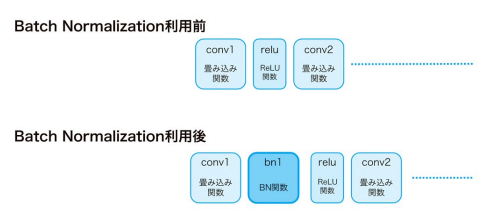  

  - 畳み込み処理中はnn.BatchNorm2dを，線形関数直後はnn.BatchNorm1dを利用する
  - インスタンス生成時は，整数パラメータを1つ取る．値は，nn.BatchNorm2dのときは入力データのチャネル数，nn.BatchNorm1dのときは入力データの次元数
  - 学習対象のパラメータとしてweightとbiasを持っている
  - ドロップアウト関数と同様に訓練フェーズと予測フェーズで挙動が異なる
    - 詳細はコラムにて


<br>  

- Data Augmentation
  - 学習前のデータに加工を施すことで，結果的に学習データのバリエーションを増やす手法
    - モデルから見ると，繰り返しのたびに，異なるパターンのデータがやってくることとなり過学習が起きにくくなる
    - PyTorchを使って画像認識の学習をする場合，このData Augumentationにとても向いた機能ある．以下にその例を示す  

    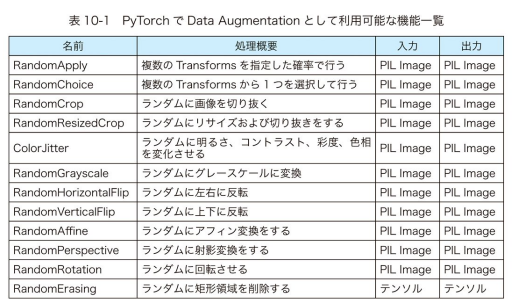  

<br>  

- Transformsを利用したData Augumentation
  - 今まで登場したToTensorとNormalizeに追加して，RandomHolizontalFlip（ランダムに左右を反転させる）と，RandomErasiong（ランダムに矩形領域を削除する）を使用
  - PyTrochでは，下記コードのようにTransformsを差し替えるだけで，あとはまったく同じコードを使って，Data Augmentation後のデータを訓練データとして利用した学習が可能

In [ ]:
import torchvision.transforms as transforms

# 訓練データ用：正規化に追加で反転とRandomErasiongを実施
transform_train = transforms.Compose([
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3,0.3), value=0, inplace=False)
])



---

# 共通関数のライブラリ化
ここでは，前章の共通関数をGoogle Colabから利用する場合，共通関数のコードをNoteBookごとにコピーする必要があるが，その手間を省くためにimport文で共通関数を使えるようにする  
※ 詳しくは本誌No.410を参照

In [ ]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
# 共通関数のダウンロード
!git clone https://github.com/makaishi2/pythonlibs.git

# 共通関数のロード
from pythonlibs.torch_lib1 import *

# 共通関数の存在チェック
print(README)



---

# 階層を深くしたモデルの実装


<br>  

- データ準備

In [ ]:
# GPUチェック

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
# 分類先クラスの名称リスト
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 分類先クラス数　今回は10になる
n_output = len(list(set(classes)))

# 結果確認
print(n_output)

In [ ]:
# Transformsの定義

transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

In [ ]:
# データ取得用関数 Dataset

data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform)

# 検証データの取得
test_set = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform)

In [ ]:
# ミニバッチのサイズ指定
batch_size = 100

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(train_set, 
    batch_size = batch_size, shuffle = True)

# 検証用データローダー
# 検証時にシャッフルは不要
test_loader = DataLoader(test_set,  
    batch_size = batch_size, shuffle = False) 

In [ ]:
# 最初の50個の表示
show_images_labels(test_loader, classes, None, None)

<br>  

- クラス定義
  - 今回のモデルの構造は
    - 畳み込み関数6層
    - プーリング関数3層
  - ポイント
    - Conv2dのインスタンス生成に際して  
    ```
    nn.Conv2d(3, 32, 3, padding=(1,1))
    ```  
    のように**paddingオプション**を指定している
      - paddingオプションなしでカーネルサイズ3×3の畳み込み関数を利用すると入力テンソルは出力テンソルに比べて2要素分小さくなる．  
      これを防ぐために，(1,1)の大きさでpaddingすることで，入力テンソルと同じ要素数の出力テンソルが得られる
    - l1の入力サイズについて
      - これは，下記画像（再掲）の右下の情報を基に机上の計算でこの大きさを求めている  
      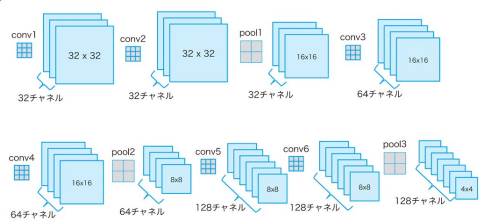

In [ ]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

<br>  

- インスタンス生成

In [ ]:
# 乱数の固定化
torch_seed()

# モデルインスタン生成
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0,5))

<br>  

- 学習

In [ ]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

<br>  

- 最終結果表示
  - 繰り返し回数40回程度で過学習が始まっている
  - 検証データで，70％弱の精度
    - 改善前は66％だったので5％程度改善

In [ ]:
evaluate_history(history)



---

# 最適化関数の選択
前節と同じモデルで，最適化関数だけ差し替えて学習
<br>  
- momentum

In [ ]:
# 乱数の固定化
torch_seed()

# 最適化関数にmomentumを指定
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
history2 = np.zeros((0,5))

In [ ]:
# 学習

num_epochs = 20
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)

In [ ]:
evaluate_history(history2)

<br>  

- Adam

In [ ]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
# 最適化関数にAdamを指定
optimizer = optim.Adam(net.parameters())
history3 = np.zeros((0, 5))

In [ ]:
print(optimizer)

In [ ]:
# 学習

num_epochs = 20
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

In [ ]:
evaluate_history(history3)

Momentum，Adamともに10回程度とSGDと比較して少ない繰り返し回数で75-76％程度とより高い精度を出している  

この結果より最適化関数を差し替えただけで，約5％の精度向上が実現できたことが分かる  

Adamの方が収束が早かったので，以降は最適化関数にAdamを使用することとする



---

# ドロップアウト
CNN_v2にドロップアウトの実装を追加したCNN_v3を記述  

ここでは，比率の違う3種類のドロップ関数を使い分けている

In [ ]:
# 予測クラスの定義

class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.2) # 追加
        self.dropout2 = nn.Dropout(0.3) # 追加
        self.dropout3 = nn.Dropout(0.4) # 追加

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1, # 追加
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2, # 追加
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3, # 追加
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3, # 追加
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

<br>  

- 学習，結果表示

In [ ]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [ ]:
# 学習

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

In [ ]:
evaluate_history(history)

最終的な検証データに対する精度は83％と，ドロップアウト導入前より7％程度良くなっている  

注意点として，CNN_v2では繰り返し回数が10回程度で最終的な精度にたどり着いているが，今回のCNN_v3ではベストの精度を出すのに，ほぼフルに50回かかっている．  

ドロップアウトでは，**過学習に対して強くなるが，学習にかかる時間がより長くなる**ことが一般に知られているので注意



---

# Batch Normalizarion
CNN_v3の精度をより上げるために，BatchNormalizationを追加したCNN_v4を作成する  

BN関数利用時は，この関数は**自分自身もパラメータを持っていて学習の一部になっている**ことに注意  

そのため，インスタンス変数を定義する際に，チャネル数が同じという理由で使いまわしてはいけないため，**使う場所ごとに別のインスタンスを定義しなければならない**


In [ ]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32) # 追加
        self.bn2 = nn.BatchNorm2d(32) # 追加
        self.bn3 = nn.BatchNorm2d(64) # 追加
        self.bn4 = nn.BatchNorm2d(64) # 追加
        self.bn5 = nn.BatchNorm2d(128) # 追加
        self.bn6 = nn.BatchNorm2d(128) # 追加

        self.features = nn.Sequential(
            self.conv1,
            self.bn1, # 追加
            self.relu,
            self.conv2,
            self.bn2, # 追加
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3, # 追加
            self.relu,
            self.conv4,
            self.bn4, # 追加
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5, # 追加
            self.relu,
            self.conv6,
            self.bn6, # 追加
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

<br>  

- 学習，結果表示

In [ ]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [ ]:
# 学習

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

In [ ]:
evaluate_history(history)

BN関数を追加することで，精度は83％から87％まで，約4％上がった



---

# Data Augmentation


In [ ]:
# 訓練データ用: 正規化に追加で反転とRandomErasingを実施
transform_train = transforms.Compose([
  transforms.RandomHorizontalFlip(p=0.5), 
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5), 
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [ ]:
# transfrom_trainを利用したデータセットの定義
train_set2 = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform_train)

# traisform_trainを利用したデータローダーの定義
batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

<br>  
定義したデータローダーで期待した通りの加工がされているかどうかを確認する

In [ ]:
# 新しい訓練用データの先頭50個を表示してみる

# 乱数初期化
torch_seed()

show_images_labels(train_loader2, classes, None, None)

<br>  

- 学習

In [ ]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

変更点は，train_loaderをtrain_loader2に変えているだけ  

ただし，ドロップアウト関数と同様に**Data Augmentationも過学習対策になる一方で，学習回数がより多く必要になる**ためエポック数を100回に増加させている

In [ ]:
# 学習
# 同じモデルでtrain_loader2に変更

num_epochs = 100
history = fit(net, optimizer, criterion, num_epochs, 
        train_loader2, test_loader, device, history)

In [ ]:
evaluate_history(history)

<br>  
最終的な精度は89％となり，2％程度向上した  

最後に，改善前に比べてどの程度正しく認識できているかを確認する

In [ ]:
show_images_labels(test_loader, classes, net, device)

<br>  

- 間違って認識した画像の抽出

In [ ]:
# 間違えた38番目のデータを抽出
for images, labels in test_loader:
    break
image = images[37]
label = labels[37]

# イメージを表示して確認
plt.figure(figsize=(3,3))
w = image.numpy().copy()
w2 = np.transpose(w, (1, 2, 0))
w3 = (w2 + 1)/2 
plt.title(classes[label])
plt.imshow(w3)
plt.show()

<br>  
- 間違って認識した画像のラベル別の確率値
  - 抽出した画像を入力としてnet関数で予測値を取得する
  - 帰ってきた値をsoftmax関数にかけると確率値が取得可能
  - PyTorchでは，Kerasと違ってモデルの出力値がそのまま確率値とはならないが，下記のコードのようにsoftmax関数に1回かけることで，確率値が得られる

In [ ]:
# 予測値を取得
image = image.view(1, 3, 32, 32)
image = image.to(device)
output = net(image)

# ラベル別の確率値を表示
probs = torch.softmax(output, dim=1)
probs_np = probs.data.to('cpu').numpy()[0]
values = np.frompyfunc(lambda x: f'{x:.04f}', 1, 1)(probs_np)
names = np.array(classes)
tbl = np.array([names, values]).T
print(tbl)



---

# コラム　net.train()とnet.eval()の意味
BN関数とドロップアウト関数は訓練フェーズと予測フェーズでふるまいが変わるため，現状がどちらのフェーズなのかを`net.train()`と`net.eval()`で知らせる  

この機能はモデルクラスの親クラスであるnn.Moduleクラスないで定義されている．

# コラム　Batch Normalization利用上の注意点
説明したようにBN層は，パラメータを持つので下記コードのように使いまわすと正しく機能しない  
```
class CNN_v5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn1,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn2,
            self.relu,
            self.conv4,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn3,
            self.relu,
            self.conv6,
            self.bn3,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3
```   

上記の間違ったコードの損失の計算グラフを可視化すると下図のように表示される  
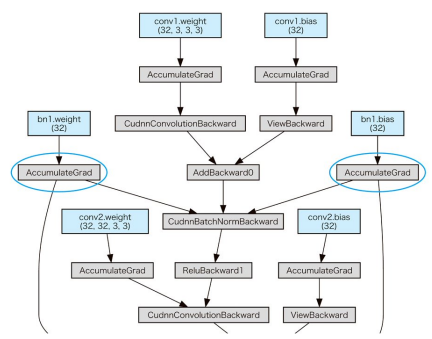  
図を見て分かるように二股のノードがあることが分かる．  

これは，内部にパラメータをもっている関数を2箇所で使いまわしたことで生じている現象である．  

このように，計算グラフの可視化がモデルのデバックにも役立つことがある



---

# Batch Normalizationの処理内容
略

# 11章　事前学習済みモデルの学習

実務上では，学習をゼロの状態から始めるよりも，インターネット上に公開されている事前学習済みモデルを利用して効率良く学習することの方が多い  

本章では，そういったモデルを活用して前章よりも高い精度のモデルを目指す



---

# 本章で取り扱う重要概念